In [1]:
import json
import requests
import pandas as pd
import os
from dotenv import load_dotenv
import hvplot.pandas

In [2]:
load_dotenv()

True

In [3]:
# Confirm the availability of your Glassnode API access key by checking its type
API_KEY = os.getenv("GLASSNODE_API_KEY")
if not API_KEY:
    print("Error with the glassnode.com API key. Check the .env file.")
type(API_KEY)

str

In [4]:
# define coin
coin = 'BTC'

In [5]:
# Build the first of three Level-2-Dataframes: Network Health

In [6]:
## Extract active address data

In [7]:
active_address = requests.get('https://api.glassnode.com/v1/metrics/addresses/active_count', params={'a': coin, 'api_key': API_KEY})

In [8]:
active_address_df = pd.read_json(active_address.text, convert_dates=['t'])
active_address_df.set_index('t', inplace=True)
active_address_df=active_address_df.rename(columns={'v':'Active Address'})
active_address_df

Active Address
t                         
2009-01-03               0
2009-01-04               0
2009-01-05               0
2009-01-06               0
2009-01-07               0
...                    ...
2021-07-05          920363
2021-07-06          838259
2021-07-07          812872
2021-07-08          800764
2021-07-09          841432

[4571 rows x 1 columns]

<AxesSubplot:title={'center':'Active Address'}, xlabel='t'>

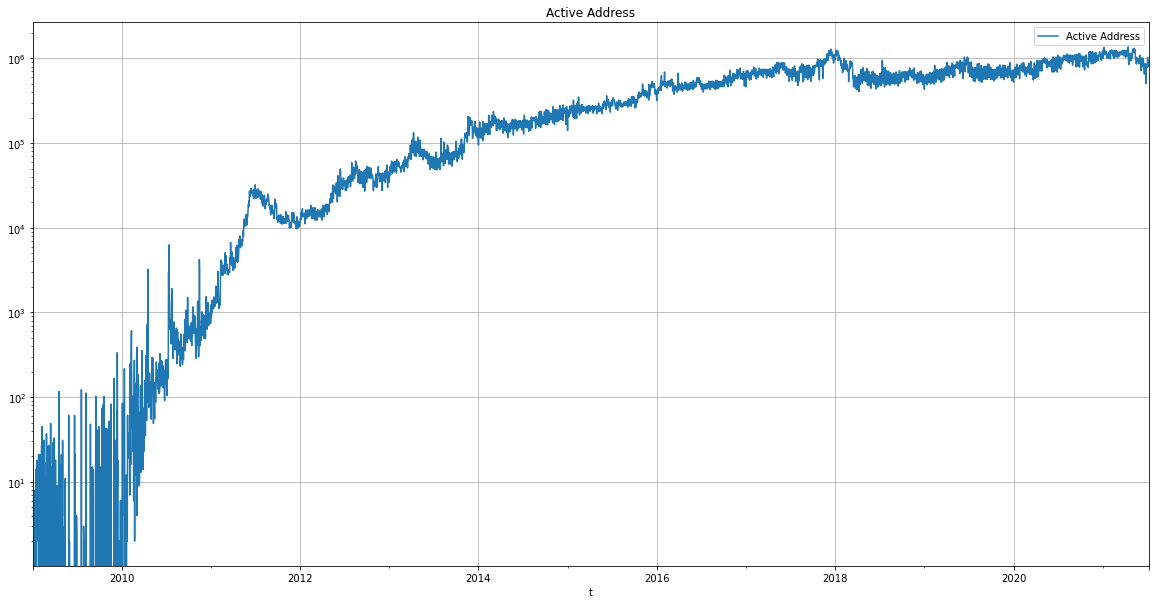

In [9]:
active_address_df.plot(figsize=(20,10), grid=True, logy=True, title='Active Address')

In [10]:
## Extract total transfer volume data

In [11]:
total_transfer_volume = requests.get('https://api.glassnode.com/v1/metrics/transactions/transfers_volume_sum', params={'a': coin, 'api_key': API_KEY})

In [12]:
total_transfer_volume_df = pd.read_json(total_transfer_volume.text, convert_dates=['t'])
total_transfer_volume_df.set_index('t', inplace=True)
total_transfer_volume_df = total_transfer_volume_df.rename(columns={'v':'Total Transfer Volume'})
total_transfer_volume_df

Total Transfer Volume
t                                
2009-01-03           0.000000e+00
2009-01-04           0.000000e+00
2009-01-05           0.000000e+00
2009-01-06           0.000000e+00
2009-01-07           0.000000e+00
...                           ...
2021-07-05           1.439888e+06
2021-07-06           1.332011e+06
2021-07-07           1.324880e+06
2021-07-08           3.250505e+06
2021-07-09           3.424756e+06

[4571 rows x 1 columns]

<AxesSubplot:title={'center':'Total Transfer Volume'}, xlabel='t'>

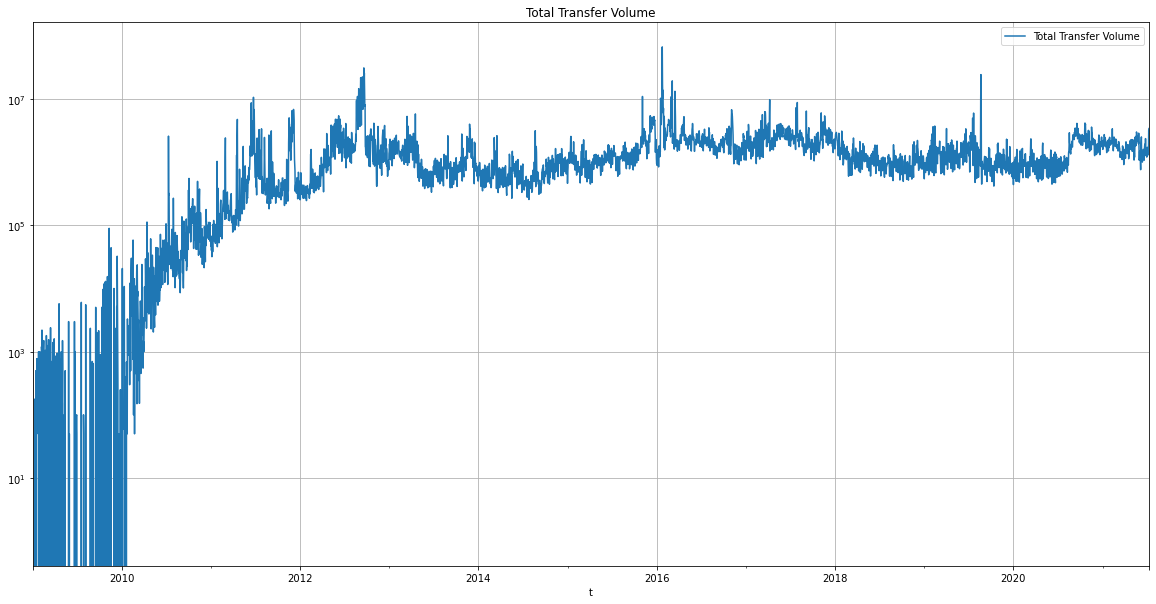

In [13]:
total_transfer_volume_df.plot(figsize=(20,10), grid=True, logy=True, title='Total Transfer Volume')

In [14]:
## Extract velocity data

In [15]:
velocity = requests.get('https://api.glassnode.com/v1/metrics/indicators/velocity', params={'a': coin, 'api_key': API_KEY})

In [16]:
velocity_df = pd.read_json(velocity.text, convert_dates=['t'])
velocity_df.set_index('t', inplace=True)
velocity_df = velocity_df.rename(columns={'v':'Velocity'})
velocity_df

Velocity
t                   
2010-07-18  0.010432
2010-07-19  0.013640
2010-07-20  0.008629
2010-07-21  0.007955
2010-07-22  0.011374
...              ...
2021-07-05  0.017975
2021-07-06  0.020433
2021-07-07  0.022266
2021-07-08  0.022810
2021-07-09  0.018888

[4010 rows x 1 columns]

<AxesSubplot:title={'center':'Velocity'}, xlabel='t'>

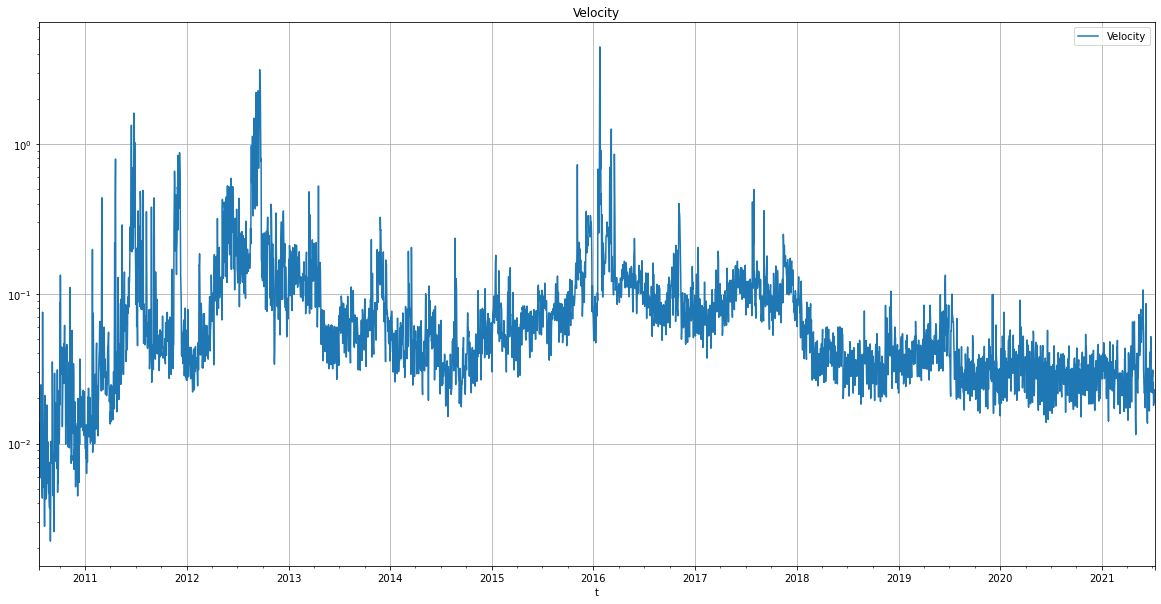

In [17]:
velocity_df.plot(figsize=(20,10), grid=True, logy=True, title='Velocity')

In [18]:
## Extract transaction count data

In [19]:
transaction_count= requests.get('https://api.glassnode.com/v1/metrics/transactions/count', params={'a': coin, 'api_key': API_KEY})

In [20]:
transaction_count_df = pd.read_json(transaction_count.text, convert_dates=['t'])
transaction_count_df.set_index('t', inplace=True)
transaction_count_df = transaction_count_df.rename(columns={'v':'Transaction Count'})
transaction_count_df

Transaction Count
t                            
2009-01-03                  0
2009-01-04                  0
2009-01-05                  0
2009-01-06                  0
2009-01-07                  0
...                       ...
2021-07-05             223628
2021-07-06             228137
2021-07-07             221104
2021-07-08             230580
2021-07-09             227380

[4571 rows x 1 columns]

<AxesSubplot:title={'center':'Transaction Count'}, xlabel='t'>

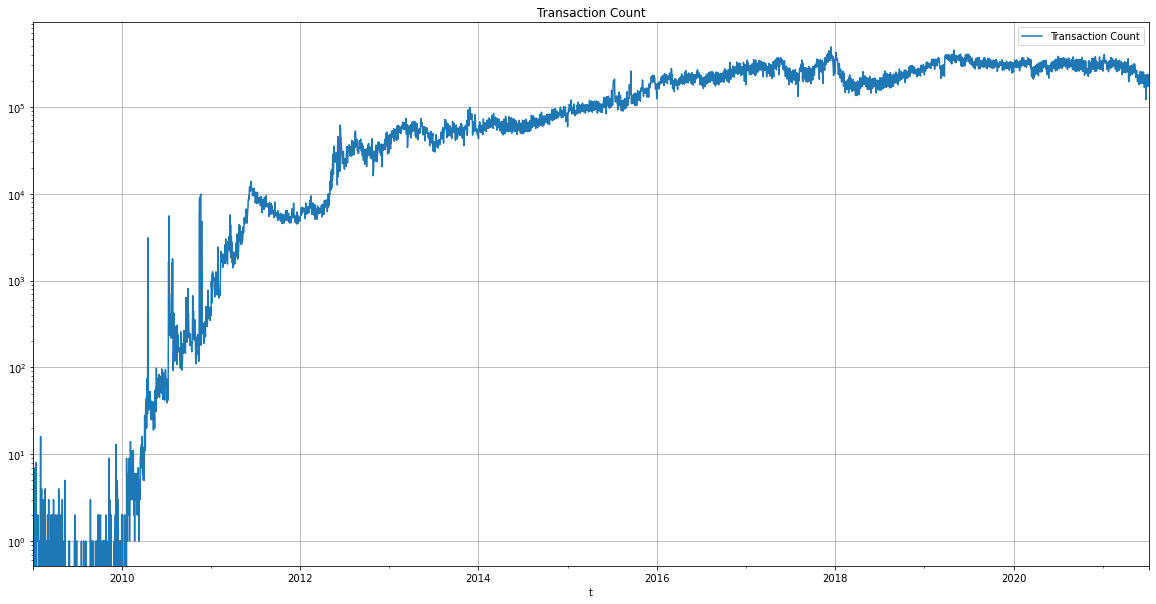

In [21]:
transaction_count_df.plot(figsize=(20,10), grid=True, logy=True, title='Transaction Count')

In [22]:
### Build Level-3-Dataframe: Usage

In [23]:
usage_df_l3 = pd.concat([active_address_df,total_transfer_volume_df,velocity_df,transaction_count_df],axis=1).dropna()
usage_df_l3

Active Address  Total Transfer Volume  Velocity  Transaction Count
t                                                                             
2010-07-18             757           3.606926e+04  0.010432                248
2010-07-19             808           4.714966e+04  0.013640                354
2010-07-20             728           2.990234e+04  0.008629                413
2010-07-21             621           2.765454e+04  0.007955                256
2010-07-22             427           3.963162e+04  0.011374                221
...                    ...                    ...       ...                ...
2021-07-05          920363           1.439888e+06  0.017975             223628
2021-07-06          838259           1.332011e+06  0.020433             228137
2021-07-07          812872           1.324880e+06  0.022266             221104
2021-07-08          800764           3.250505e+06  0.022810             230580
2021-07-09          841432           3.424756e+06  0.018888             227380

[4010 rows x 4 columns]

In [24]:
#### Evaluate correlation among columns

In [25]:
usage_df_l3.corr()

Active Address  Total Transfer Volume  Velocity  \
Active Address               1.000000               0.142617 -0.154904   
Total Transfer Volume        0.142617               1.000000  0.884350   
Velocity                    -0.154904               0.884350  1.000000   
Transaction Count            0.943163               0.162638 -0.130737   

                       Transaction Count  
Active Address                  0.943163  
Total Transfer Volume           0.162638  
Velocity                       -0.130737  
Transaction Count               1.000000

In [26]:
### Drop Transaction Count due to high correlation with Active Address.

In [27]:
usage_df_l3 = usage_df_l3.drop(columns='Transaction Count')
usage_df_l3

Active Address  Total Transfer Volume  Velocity
t                                                          
2010-07-18             757           3.606926e+04  0.010432
2010-07-19             808           4.714966e+04  0.013640
2010-07-20             728           2.990234e+04  0.008629
2010-07-21             621           2.765454e+04  0.007955
2010-07-22             427           3.963162e+04  0.011374
...                    ...                    ...       ...
2021-07-05          920363           1.439888e+06  0.017975
2021-07-06          838259           1.332011e+06  0.020433
2021-07-07          812872           1.324880e+06  0.022266
2021-07-08          800764           3.250505e+06  0.022810
2021-07-09          841432           3.424756e+06  0.018888

[4010 rows x 3 columns]

In [28]:
## Extract circulating supply data

In [29]:
circulating_supply= requests.get('https://api.glassnode.com/v1/metrics/supply/current', params={'a': coin, 'api_key': API_KEY})

In [30]:
circulating_supply_df = pd.read_json(circulating_supply.text, convert_dates=['t'])
circulating_supply_df.set_index('t', inplace=True)
circulating_supply_df = circulating_supply_df.rename(columns={'v':'Circulating Supply'})
circulating_supply_df

Circulating Supply
t                             
2009-01-03               50.00
2009-01-04               50.00
2009-01-05               50.00
2009-01-06               50.00
2009-01-07               50.00
...                        ...
2021-07-05         18748856.25
2021-07-06         18749743.75
2021-07-07         18750512.50
2021-07-08         18751381.25
2021-07-09         18752200.00

[4571 rows x 1 columns]

<AxesSubplot:title={'center':'Circulating Supply'}, xlabel='t'>

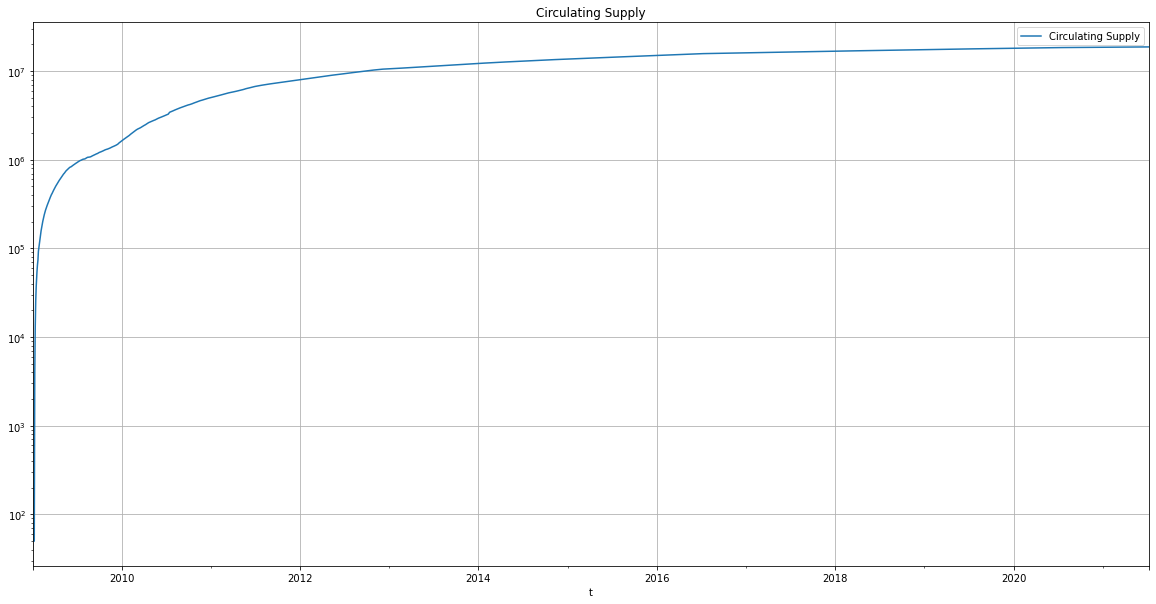

In [31]:
circulating_supply_df.plot(figsize=(20,10), grid=True, logy=True, title='Circulating Supply')

In [32]:
## Extract issuance data

In [33]:
issuance = requests.get('https://api.glassnode.com/v1/metrics/supply/issued', params={'a': coin, 'api_key': API_KEY})

In [34]:
issuance_df = pd.read_json(issuance.text, convert_dates=['t'])
issuance_df.set_index('t', inplace=True)
issuance_df = issuance_df.rename(columns={'v':'Issuance'})
issuance_df

Issuance
t                   
2009-01-03     50.00
2009-01-04      0.00
2009-01-05      0.00
2009-01-06      0.00
2009-01-07      0.00
...              ...
2021-07-05    825.00
2021-07-06    887.50
2021-07-07    768.75
2021-07-08    868.75
2021-07-09    818.75

[4571 rows x 1 columns]

<AxesSubplot:title={'center':'Issuance'}, xlabel='t'>

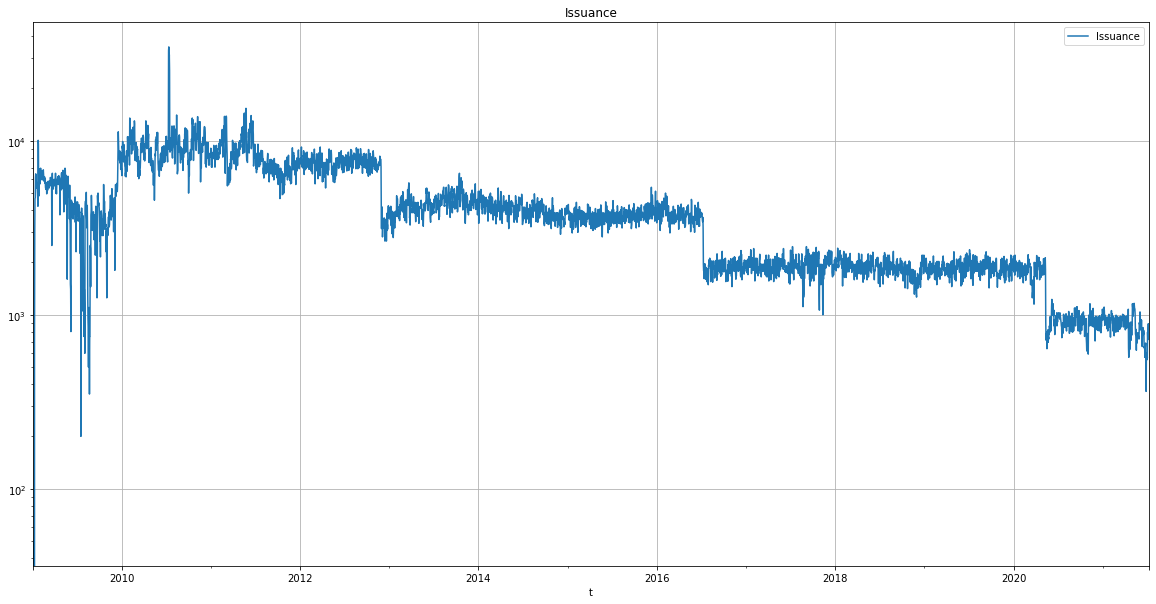

In [35]:
issuance_df.plot(figsize=(20,10), grid=True, logy=True, title='Issuance')

In [36]:
### Build Level-3-Dataframe: monetary_integrity_df_l3

In [37]:
monetary_integrity_df_l3 = pd.concat([circulating_supply_df,issuance_df],axis=1).dropna()
monetary_integrity_df_l3

Circulating Supply  Issuance
t                                       
2009-01-03               50.00     50.00
2009-01-04               50.00      0.00
2009-01-05               50.00      0.00
2009-01-06               50.00      0.00
2009-01-07               50.00      0.00
...                        ...       ...
2021-07-05         18748856.25    825.00
2021-07-06         18749743.75    887.50
2021-07-07         18750512.50    768.75
2021-07-08         18751381.25    868.75
2021-07-09         18752200.00    818.75

[4571 rows x 2 columns]

In [38]:
monetary_integrity_df_l3.corr()

Circulating Supply  Issuance
Circulating Supply            1.000000 -0.736374
Issuance                     -0.736374  1.000000

In [39]:
## Extract hash rate data

In [40]:
#hash_rate = requests.get('https://api.glassnode.com/v1/metrics/mining/hash_rate_mean', params={'a': coin, 'api_key': API_KEY})

In [41]:
# import json
# pd.io.json._json.loads = lambda s, *a, **k: json.load(hash_rate.text)
# hash_rate_df = json.loads(hash_rate.text)
# hash_rate_df = pd.DataFrame(hash_rate_df)
# hash_rate_df = hash_rate_df.set_index('t')
# hash_rate_df.index = pd.to_datetime(hash_rate_df.index, unit='s')
# hash_rate_df = hash_rate_df.rename(columns={'v':'Hash Rate'})
# hash_rate_df

In [42]:
#hash_rate_df.loc[hash_rate_df['Hash Rate']==hash_rate_df['Hash Rate'].max()]

In [43]:
#type(hash_rate_df.iloc[0,0])

In [44]:
#hash_rate_df = hash_rate_df[:'2021-08-01']

In [45]:
#hash_rate_df.dtypes

# hash_rate_df['Hash Rate'] = hash_rate_df["Hash Rate"].astype('int64')

In [46]:
#hash_rate_df.plot(y='Hash Rate',figsize=(20,10), grid=True, logy=True, title='Hash Rate')

In [47]:
## Extract miner revenue data

In [48]:
#import json
#pd.io.json._json.loads = lambda s, *a, **k: json.load(hash_rate.text)

In [49]:
## Extract Miner Revenue data

In [50]:
miner_revenue = requests.get('https://api.glassnode.com/v1/metrics/mining/revenue_sum', params={'a': coin, 'api_key': API_KEY})

In [51]:
miner_revenue_df = pd.read_json(miner_revenue.text, convert_dates=['t'])
miner_revenue_df.set_index('t', inplace=True)
miner_revenue_df = miner_revenue_df.rename(columns={'v':'Miner Revenue'})
miner_revenue_df

Miner Revenue
t                        
2009-01-03      50.000000
2009-01-04       0.000000
2009-01-05       0.000000
2009-01-06       0.000000
2009-01-07       0.000000
...                   ...
2021-07-05     872.545607
2021-07-06     934.574453
2021-07-07     806.598127
2021-07-08     898.027984
2021-07-09     845.627049

[4571 rows x 1 columns]

<AxesSubplot:title={'center':'Miner Revenue'}, xlabel='t'>

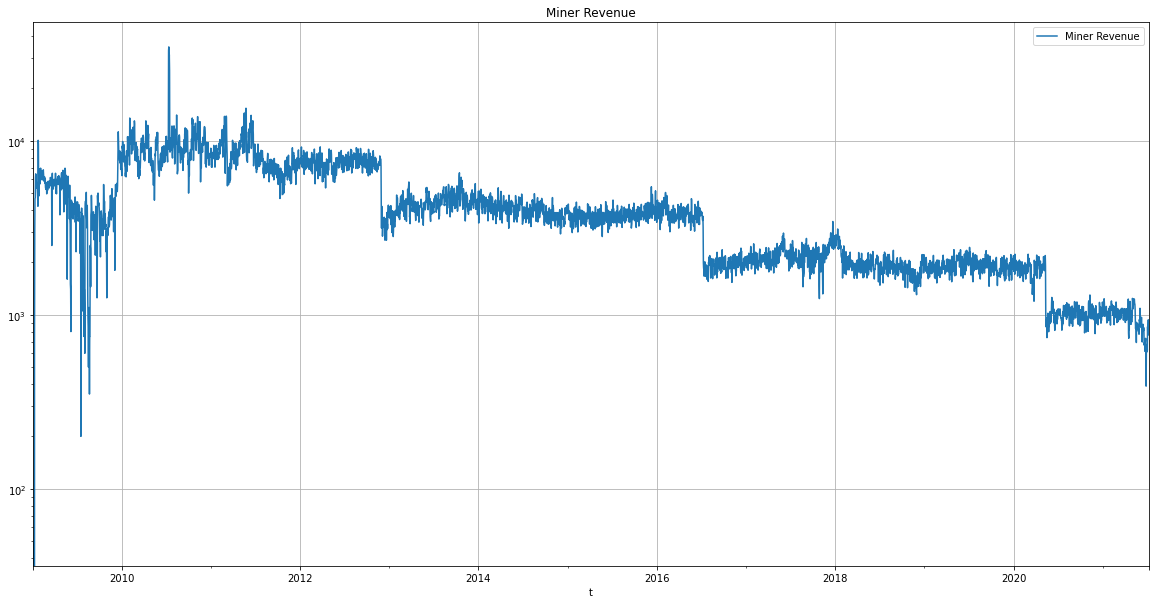

In [52]:
miner_revenue_df.plot(figsize=(20,10), grid=True, logy=True, title='Miner Revenue')

In [53]:
## Extract difficulty data

In [54]:
difficulty = requests.get('https://api.glassnode.com/v1/metrics/indicators/difficulty_ribbon_compression', params={'a': coin, 'api_key': API_KEY})

In [55]:
difficulty_df = pd.read_json(difficulty.text, convert_dates=['t'])
difficulty_df.set_index('t', inplace=True)
difficulty_df = difficulty_df.rename(columns={'v':'Difficulty'})
difficulty_df

Difficulty
t                     
2009-07-28    0.000000
2009-07-29    0.000000
2009-07-30    0.000000
2009-07-31    0.000000
2009-08-01    0.000000
...                ...
2021-07-05    0.068791
2021-07-06    0.078526
2021-07-07    0.088585
2021-07-08    0.098761
2021-07-09    0.109115

[4365 rows x 1 columns]

<AxesSubplot:title={'center':'Difficulty'}, xlabel='t'>

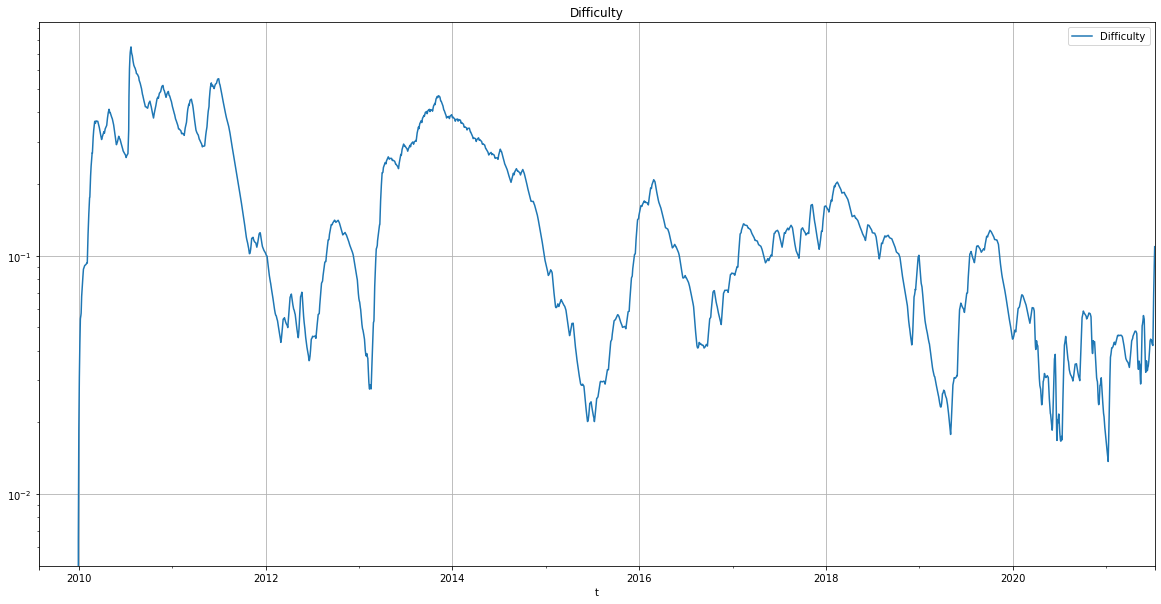

In [56]:
difficulty_df.plot(figsize=(20,10), grid=True, logy=True, title='Difficulty')

In [57]:
## Extract Thrermocap data

In [58]:
thermocap = requests.get('https://api.glassnode.com/v1/metrics/mining/thermocap', params={'a': coin, 'api_key': API_KEY})

In [59]:
thermocap_df = pd.read_json(thermocap.text, convert_dates=['t'])
thermocap_df.set_index('t', inplace=True)
thermocap_df = thermocap_df.rename(columns={'v':'Thermocap'})
thermocap_df

Thermocap
t                       
2010-07-18  1.708201e+05
2010-07-19  1.716100e+05
2010-07-20  1.723301e+05
2010-07-21  1.730580e+05
2010-07-22  1.736565e+05
...                  ...
2021-07-05  2.724693e+10
2021-07-06  2.727725e+10
2021-07-07  2.730382e+10
2021-07-08  2.733241e+10
2021-07-09  2.735956e+10

[4010 rows x 1 columns]

<AxesSubplot:title={'center':'Thermocap'}, xlabel='t'>

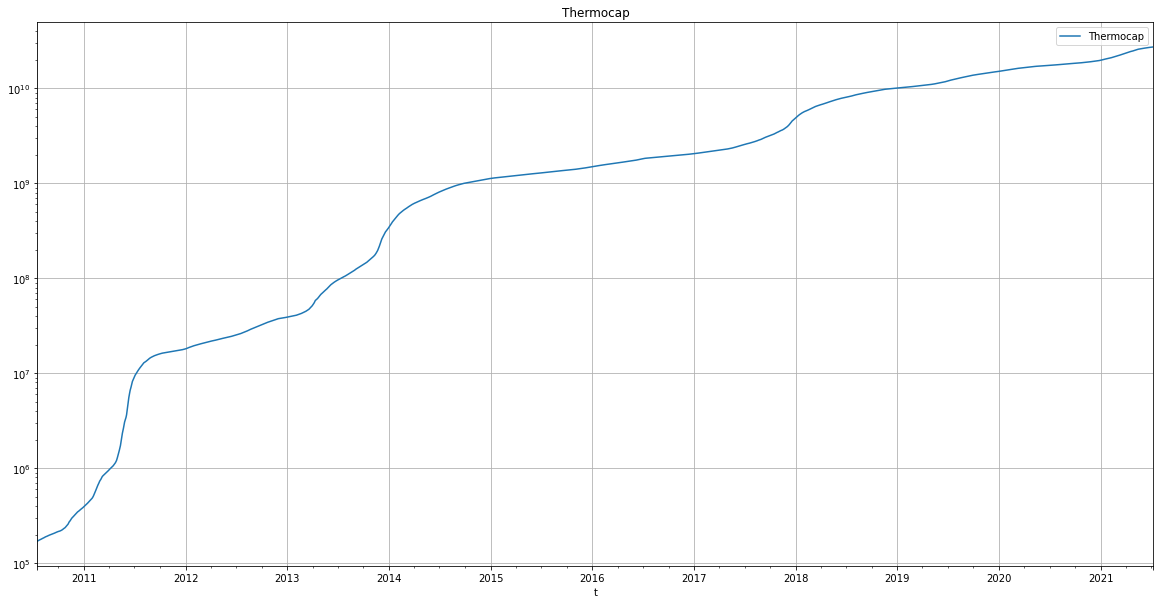

In [60]:
thermocap_df.plot(figsize=(20,10), grid=True, logy=True, title='Thermocap')

In [61]:
### Build Level-3-Dataframe: security_df_l3

In [62]:
security_df_l3 = pd.concat([miner_revenue_df,difficulty_df, thermocap_df],axis=1).dropna()
security_df_l3

Miner Revenue  Difficulty     Thermocap
t                                                  
2010-07-18    8600.830000    0.608607  1.708201e+05
2010-07-19    8700.090000    0.652693  1.716100e+05
2010-07-20    9050.000000    0.686378  1.723301e+05
2010-07-21   10350.000000    0.713103  1.730580e+05
2010-07-22    8800.000000    0.728067  1.736565e+05
...                   ...         ...           ...
2021-07-05     872.545607    0.068791  2.724693e+10
2021-07-06     934.574453    0.078526  2.727725e+10
2021-07-07     806.598127    0.088585  2.730382e+10
2021-07-08     898.027984    0.098761  2.733241e+10
2021-07-09     845.627049    0.109115  2.735956e+10

[4010 rows x 3 columns]

In [63]:
security_df_l3.corr()

Miner Revenue  Difficulty  Thermocap
Miner Revenue       1.000000    0.615033  -0.633576
Difficulty          0.615033    1.000000  -0.460834
Thermocap          -0.633576   -0.460834   1.000000

In [64]:
# Build the second of three Level-2-Dataframes: Network Health

In [65]:
network_health_df_l2 = pd.concat([usage_df_l3,monetary_integrity_df_l3,security_df_l3],axis=1).dropna()

In [66]:
network_health_df_l2

Active Address  Total Transfer Volume  Velocity  \
t                                                             
2010-07-18           757.0           3.606926e+04  0.010432   
2010-07-19           808.0           4.714966e+04  0.013640   
2010-07-20           728.0           2.990234e+04  0.008629   
2010-07-21           621.0           2.765454e+04  0.007955   
2010-07-22           427.0           3.963162e+04  0.011374   
...                    ...                    ...       ...   
2021-07-05        920363.0           1.439888e+06  0.017975   
2021-07-06        838259.0           1.332011e+06  0.020433   
2021-07-07        812872.0           1.324880e+06  0.022266   
2021-07-08        800764.0           3.250505e+06  0.022810   
2021-07-09        841432.0           3.424756e+06  0.018888   

            Circulating Supply  Issuance  Miner Revenue  Difficulty  \
t                                                                     
2010-07-18          3447600.00   8600.00    8600.830000    0.608607   
2010-07-19          3456300.00   8700.00    8700.090000    0.652693   
2010-07-20          3465350.00   9050.00    9050.000000    0.686378   
2010-07-21          3475700.00  10350.00   10350.000000    0.713103   
2010-07-22          3484500.00   8800.00    8800.000000    0.728067   
...                        ...       ...            ...         ...   
2021-07-05         18748856.25    825.00     872.545607    0.068791   
2021-07-06         18749743.75    887.50     934.574453    0.078526   
2021-07-07         18750512.50    768.75     806.598127    0.088585   
2021-07-08         18751381.25    868.75     898.027984    0.098761   
2021-07-09         18752200.00    818.75     845.627049    0.109115   

               Thermocap  
t                         
2010-07-18  1.708201e+05  
2010-07-19  1.716100e+05  
2010-07-20  1.723301e+05  
2010-07-21  1.730580e+05  
2010-07-22  1.736565e+05  
...                  ...  
2021-07-05  2.724693e+10  
2021-07-06  2.727725e+10  
2021-07-07  2.730382e+10  
2021-07-08  2.733241e+10  
2021-07-09  2.735956e+10  

[4010 rows x 8 columns]

In [67]:
network_health_df_l2.corr()

Active Address  Total Transfer Volume  Velocity  \
Active Address               1.000000               0.142617 -0.154904   
Total Transfer Volume        0.142617               1.000000  0.884350   
Velocity                    -0.154904               0.884350  1.000000   
Circulating Supply           0.878626               0.143703 -0.135947   
Issuance                    -0.811017              -0.087181  0.187325   
Miner Revenue               -0.801760              -0.081474  0.190168   
Difficulty                  -0.546483              -0.174710 -0.014215   
Thermocap                    0.803567               0.002269 -0.204817   

                       Circulating Supply  Issuance  Miner Revenue  \
Active Address                   0.878626 -0.811017      -0.801760   
Total Transfer Volume            0.143703 -0.087181      -0.081474   
Velocity                        -0.135947  0.187325       0.190168   
Circulating Supply               1.000000 -0.934520      -0.933443   
Issuance                        -0.934520  1.000000       0.999320   
Miner Revenue                   -0.933443  0.999320       1.000000   
Difficulty                      -0.670934  0.613788       0.615033   
Thermocap                        0.700301 -0.630162      -0.633576   

                       Difficulty  Thermocap  
Active Address          -0.546483   0.803567  
Total Transfer Volume   -0.174710   0.002269  
Velocity                -0.014215  -0.204817  
Circulating Supply      -0.670934   0.700301  
Issuance                 0.613788  -0.630162  
Miner Revenue            0.615033  -0.633576  
Difficulty               1.000000  -0.460834  
Thermocap               -0.460834   1.000000

In [68]:
# Due to the high correlation between Issuance and Miner Revenue, drop Miner Revenue from security_df_l3

In [69]:
security_df_l3=security_df_l3.drop(columns='Miner Revenue')

In [70]:
security_df_l3

Difficulty     Thermocap
t                                   
2010-07-18    0.608607  1.708201e+05
2010-07-19    0.652693  1.716100e+05
2010-07-20    0.686378  1.723301e+05
2010-07-21    0.713103  1.730580e+05
2010-07-22    0.728067  1.736565e+05
...                ...           ...
2021-07-05    0.068791  2.724693e+10
2021-07-06    0.078526  2.727725e+10
2021-07-07    0.088585  2.730382e+10
2021-07-08    0.098761  2.733241e+10
2021-07-09    0.109115  2.735956e+10

[4010 rows x 2 columns]

In [71]:
network_health_df_l2= pd.concat([usage_df_l3,monetary_integrity_df_l3,security_df_l3],axis=1).dropna()
network_health_df_l2.corr()

Active Address  Total Transfer Volume  Velocity  \
Active Address               1.000000               0.142617 -0.154904   
Total Transfer Volume        0.142617               1.000000  0.884350   
Velocity                    -0.154904               0.884350  1.000000   
Circulating Supply           0.878626               0.143703 -0.135947   
Issuance                    -0.811017              -0.087181  0.187325   
Difficulty                  -0.546483              -0.174710 -0.014215   
Thermocap                    0.803567               0.002269 -0.204817   

                       Circulating Supply  Issuance  Difficulty  Thermocap  
Active Address                   0.878626 -0.811017   -0.546483   0.803567  
Total Transfer Volume            0.143703 -0.087181   -0.174710   0.002269  
Velocity                        -0.135947  0.187325   -0.014215  -0.204817  
Circulating Supply               1.000000 -0.934520   -0.670934   0.700301  
Issuance                        -0.934520  1.000000    0.613788  -0.630162  
Difficulty                      -0.670934  0.613788    1.000000  -0.460834  
Thermocap                        0.700301 -0.630162   -0.460834   1.000000

In [72]:
# Use heat map to visualize correlation
network_health_df_l2.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=700,
    height=500
)

:HeatMap   [columns,index]   (value)

In [73]:
# Build the second of three Level-2-Dataframes: Buyer & Seller Behavior

In [74]:
## Extract Miner Unspent Supply (UTXO)

In [75]:
utxo = requests.get('https://api.glassnode.com/v1/metrics/mining/miners_unspent_supply', params={'a': coin, 'api_key': API_KEY})

In [76]:
utxo_df = pd.read_json(utxo.text, convert_dates=['t'])
utxo_df.set_index('t', inplace=True)
utxo_df = utxo_df.rename(columns={'v':'UTXO'})
utxo_df

UTXO
t                       
2009-01-03  5.000000e+01
2009-01-04  5.000000e+01
2009-01-05  5.000000e+01
2009-01-06  5.000000e+01
2009-01-07  5.000000e+01
...                  ...
2020-07-05  1.765754e+06
2020-07-06  1.765835e+06
2020-07-07  1.765756e+06
2020-07-08  1.765617e+06
2020-07-09  1.766044e+06

[4206 rows x 1 columns]

In [77]:
## Extract Coin Years Destroyed (CYD)  

In [78]:
cyd = requests.get('https://api.glassnode.com/v1/metrics/indicators/cyd', params={'a': coin, 'api_key': API_KEY})

In [79]:
cyd_df = pd.read_json(cyd.text, convert_dates=['t'])
cyd_df.set_index('t', inplace=True)
cyd_df = cyd_df.rename(columns={'v':'CYD'})
cyd_df

CYD
t                       
2010-01-11  3.461755e+06
2010-01-12  3.943371e+06
2010-01-13  3.943582e+06
2010-01-14  3.949321e+06
2010-01-15  3.949512e+06
...                  ...
2021-07-05  4.574433e+09
2021-07-06  4.573218e+09
2021-07-07  4.571468e+09
2021-07-08  4.560950e+09
2021-07-09  4.562103e+09

[4198 rows x 1 columns]

In [80]:
## Net Unrealized Profit & Losses (NUPL) 

In [81]:
nupl = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [82]:
nupl_df = pd.read_json(nupl.text, convert_dates=['t'])
nupl_df.set_index('t', inplace=True)
nupl_df = nupl_df.rename(columns={'v':'NUPL'})
nupl_df

NUPL
t                   
2010-07-18  0.421756
2010-07-19  0.380821
2010-07-20  0.328775
2010-07-21  0.365481
2010-07-22  0.102038
...              ...
2021-07-05  0.427749
2021-07-06  0.433471
2021-07-07  0.428202
2021-07-08  0.411357
2021-07-09  0.429202

[4010 rows x 1 columns]

In [83]:
## Realized Cap (RC) 

In [84]:
rc = requests.get('https://api.glassnode.com/v1/metrics/market/marketcap_realized_usd', params={'a': coin, 'api_key': API_KEY})

In [85]:
rc_df = pd.read_json(rc.text, convert_dates=['t'])
rc_df.set_index('t', inplace=True)
rc_df = rc_df.rename(columns={'v':'Realized Cap'})
rc_df

Realized Cap
t                       
2009-01-03  2.475500e+00
2009-01-04           NaN
2009-01-05           NaN
2009-01-06           NaN
2009-01-07           NaN
...                  ...
2021-07-05  3.627696e+11
2021-07-06  3.627395e+11
2021-07-07  3.628266e+11
2021-07-08  3.624590e+11
2021-07-09  3.625169e+11

[4571 rows x 1 columns]

In [86]:
# Build the second of three Level-2-Dataframes: Buyer & Seller Behavior

In [87]:
buyer_and_seller_behavior_df_l2=pd.concat([utxo_df,cyd_df,nupl_df,rc_df],axis=1).dropna()
buyer_and_seller_behavior_df_l2

UTXO           CYD      NUPL  Realized Cap
t                                                             
2010-07-18  2.382007e+06  5.396822e+07  0.421756  1.711265e+05
2010-07-19  2.379557e+06  5.441558e+07  0.380821  1.729175e+05
2010-07-20  2.383107e+06  5.440775e+07  0.328775  1.738318e+05
2010-07-21  2.381757e+06  5.530445e+07  0.365481  1.746896e+05
2010-07-22  2.387157e+06  5.557529e+07  0.102038  1.750491e+05
...                  ...           ...       ...           ...
2020-07-05  1.765754e+06  3.071930e+09  0.357381  1.073967e+11
2020-07-06  1.765835e+06  3.073557e+09  0.372642  1.074412e+11
2020-07-07  1.765756e+06  3.072857e+09  0.369753  1.074773e+11
2020-07-08  1.765617e+06  3.077731e+09  0.380346  1.076240e+11
2020-07-09  1.766044e+06  3.067280e+09  0.369555  1.076708e+11

[3645 rows x 4 columns]

In [88]:
buyer_and_seller_behavior_df_l2.corr()

UTXO       CYD      NUPL  Realized Cap
UTXO          1.000000 -0.760571  0.097323     -0.571859
CYD          -0.760571  1.000000  0.140391      0.756933
NUPL          0.097323  0.140391  1.000000     -0.019303
Realized Cap -0.571859  0.756933 -0.019303      1.000000

In [89]:
# Use heat map to visualize correlation
buyer_and_seller_behavior_df_l2.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=400,
    height=300
)

:HeatMap   [columns,index]   (value)

In [90]:
# Build the third of three Level-2-Dataframes: Valuation

In [91]:
## Extact stock-to-flow data

In [92]:
stf = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [93]:
stf_df = pd.read_json(stf.text, convert_dates=['t'])
stf_df.set_index('t', inplace=True)
stf_df = stf_df.rename(columns={'v':'Stock to Flow'})
stf_df

Stock to Flow
t                        
2010-07-18       0.421756
2010-07-19       0.380821
2010-07-20       0.328775
2010-07-21       0.365481
2010-07-22       0.102038
...                   ...
2021-07-05       0.427749
2021-07-06       0.433471
2021-07-07       0.428202
2021-07-08       0.411357
2021-07-09       0.429202

[4010 rows x 1 columns]

<AxesSubplot:title={'center':'Stock to Flow'}, xlabel='t'>

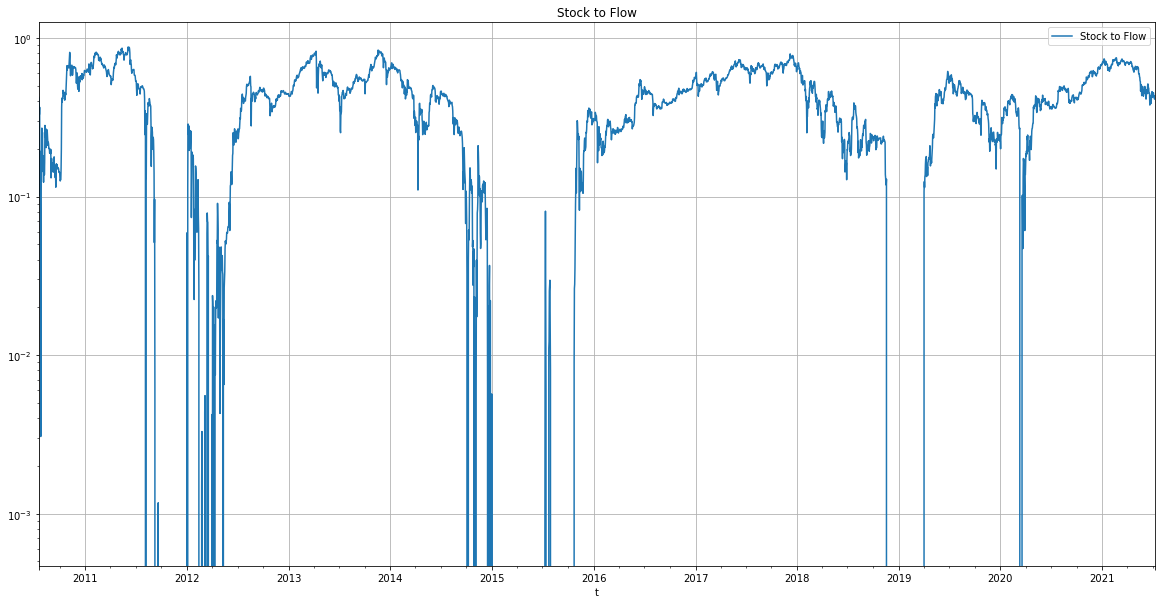

In [94]:
stf_df.plot(figsize=(20,10), grid=True, logy=True, title='Stock to Flow')

In [95]:
## Extract Market Cap to Thermocap Ratio

In [96]:
mcttc = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [97]:
mcttc_df = pd.read_json(mcttc.text, convert_dates=['t'])
mcttc_df.set_index('t', inplace=True)
mcttc_df = mcttc_df.rename(columns={'v':'Market Cap/Thermo Cap'})
mcttc_df

Market Cap/Thermo Cap
t                                
2010-07-18               0.421756
2010-07-19               0.380821
2010-07-20               0.328775
2010-07-21               0.365481
2010-07-22               0.102038
...                           ...
2021-07-05               0.427749
2021-07-06               0.433471
2021-07-07               0.428202
2021-07-08               0.411357
2021-07-09               0.429202

[4010 rows x 1 columns]

<AxesSubplot:title={'center':'Market Cap/Thermo Cap'}, xlabel='t'>

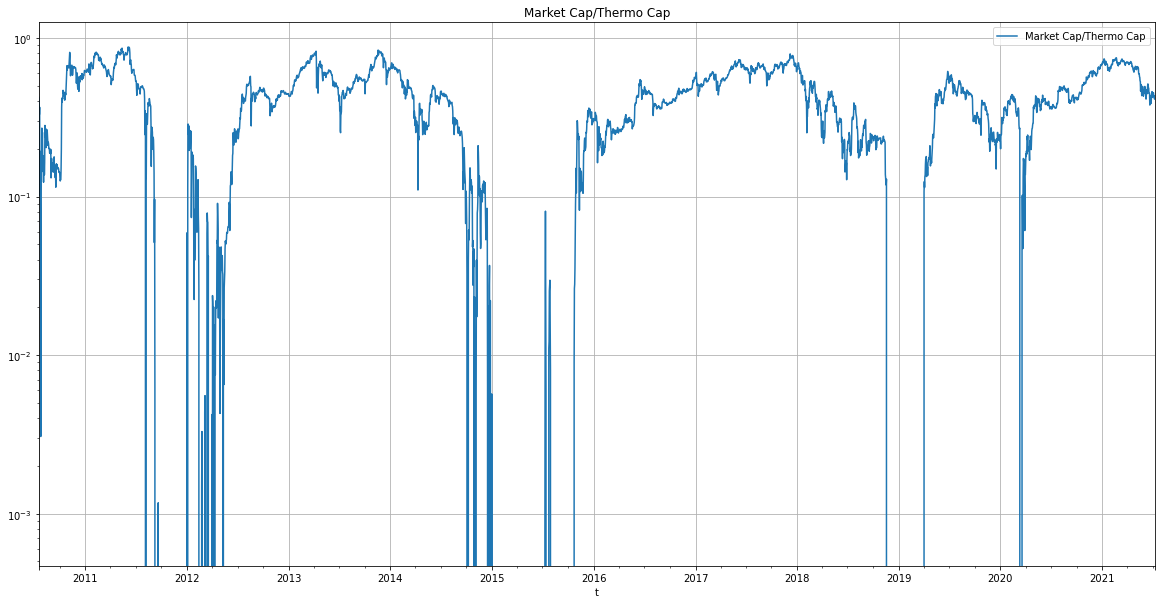

In [98]:
mcttc_df.plot(figsize=(20,10), grid=True, logy=True, title='Market Cap/Thermo Cap')

In [99]:
## Extract SOPR data

In [100]:
sopr = requests.get('https://api.glassnode.com/v1/metrics/indicators/sopr', params={'a': coin, 'api_key': API_KEY})

In [101]:
sopr_df = pd.read_json(sopr.text, convert_dates=['t'])
sopr_df.set_index('t', inplace=True)
sopr_df = sopr_df.rename(columns={'v':'SOPR'})
sopr_df

SOPR
t                   
2010-07-17  1.000000
2010-07-18  1.174760
2010-07-19  1.318536
2010-07-20  1.090517
2010-07-21  1.065532
...              ...
2021-07-05  0.997970
2021-07-06  0.998673
2021-07-07  1.001324
2021-07-08  0.996299
2021-07-09  1.000270

[4011 rows x 1 columns]

<AxesSubplot:title={'center':'SOPR'}, xlabel='t'>

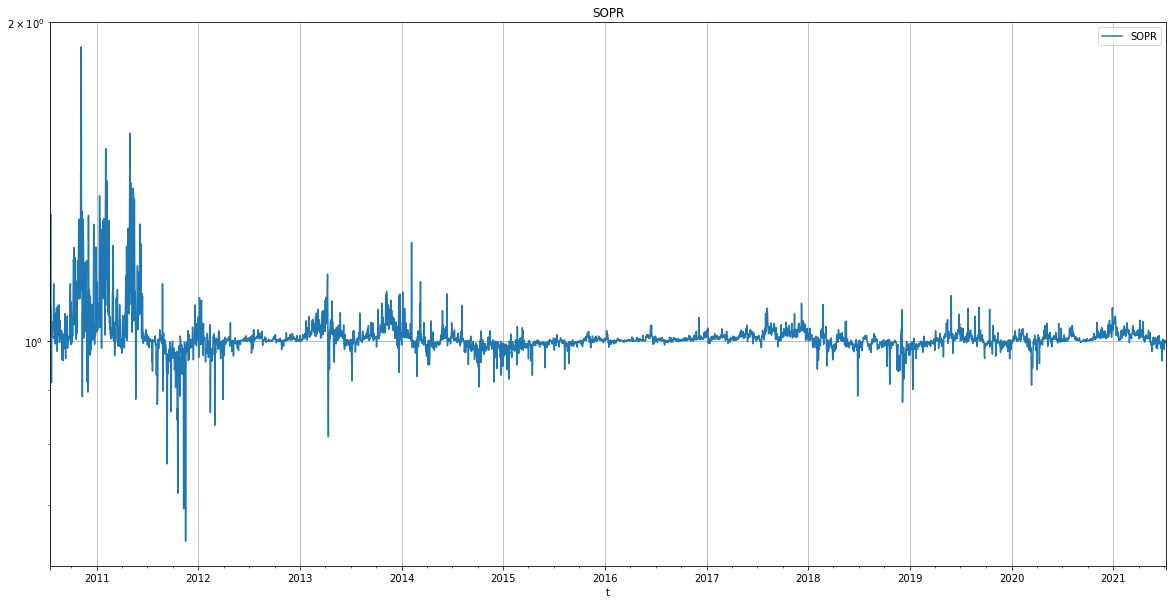

In [102]:
sopr_df.plot(figsize=(20,10), grid=True, logy=True, title='SOPR')

In [103]:
## Extract Futures Perpetual Funding Rates data

In [104]:
fpfr = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_funding_rate_perpetual', params={'a': coin, 'api_key': API_KEY})

In [105]:
fpfr_df = pd.read_json(fpfr.text, convert_dates=['t'])
fpfr_df.set_index('t', inplace=True)
fpfr_df = fpfr_df.rename(columns={'v':'Futures Perpetual Funding Rates'})
fpfr_df

Futures Perpetual Funding Rates
t                                          
2021-06-10                         0.000029
2021-06-11                         0.000012
2021-06-12                        -0.000065
2021-06-13                         0.000019
2021-06-14                         0.000040
2021-06-15                         0.000047
2021-06-16                        -0.000005
2021-06-17                        -0.000039
2021-06-18                        -0.000077
2021-06-19                        -0.000060
2021-06-20                        -0.000157
2021-06-21                        -0.000141
2021-06-22                        -0.000208
2021-06-23                        -0.000140
2021-06-24                        -0.000133
2021-06-25                        -0.000119
2021-06-26                        -0.000193
2021-06-27                        -0.000150
2021-06-28                         0.000049
2021-06-29                        -0.000024
2021-06-30                        -0.000045
2021-07-01                        -0.000085
2021-07-02                        -0.000068
2021-07-03                        -0.000022
2021-07-04                         0.000004
2021-07-05                        -0.000166
2021-07-06                        -0.000119
2021-07-07                        -0.000009
2021-07-08                        -0.000068
2021-07-09                        -0.000026

<AxesSubplot:title={'center':'Futures Perpetual Funding Rates'}, xlabel='t'>

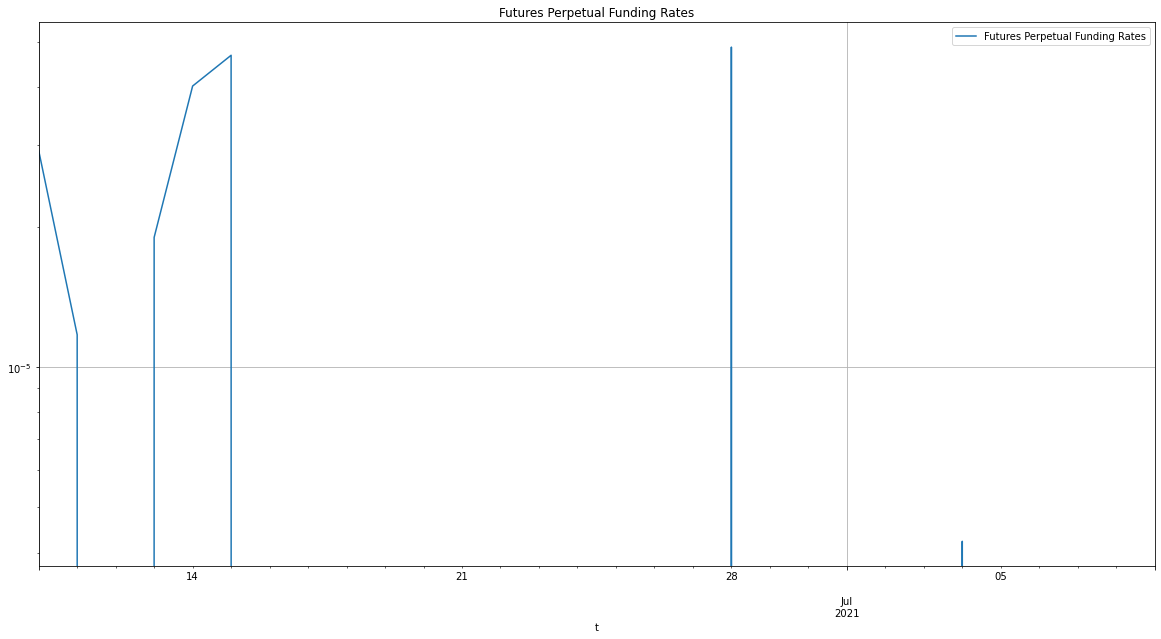

In [106]:
fpfr_df.plot(figsize=(20,10), grid=True, logy=True, title='Futures Perpetual Funding Rates')

In [107]:
## Extract Futures Estimated Leverage Ratio

In [108]:
felr = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_estimated_leverage_ratio', params={'a': coin, 'api_key': API_KEY})

In [109]:
felr_df = pd.read_json(felr.text, convert_dates=['t'])
felr_df.set_index('t', inplace=True)
felr_df = felr_df.rename(columns={'v':'Futures Estimated Leverage Ratio'})
felr_df

Futures Estimated Leverage Ratio
t                                           
2020-05-15                          0.166281
2020-05-16                          0.165119
2020-05-17                          0.170652
2020-05-18                          0.167470
2020-05-19                          0.166283
...                                      ...
2021-07-05                          0.157650
2021-07-06                          0.156213
2021-07-07                          0.158095
2021-07-08                          0.164779
2021-07-09                          0.159600

[421 rows x 1 columns]

<AxesSubplot:title={'center':'Futures Estimated Leverage Ratio'}, xlabel='t'>

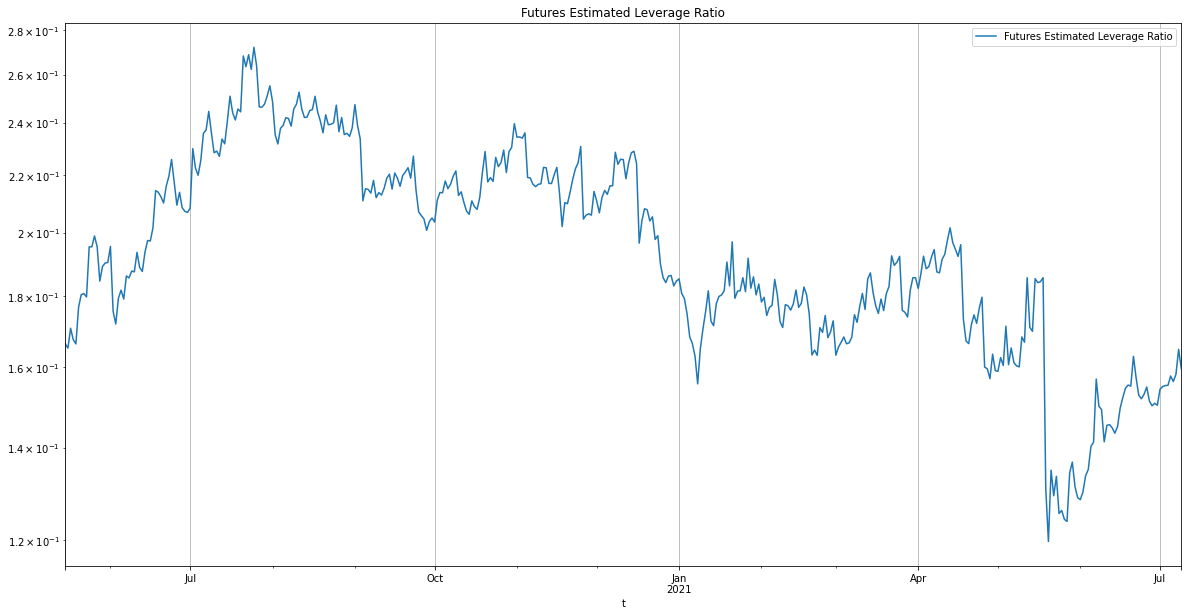

In [110]:
felr_df.plot(figsize=(20,10), grid=True, logy=True, title='Futures Estimated Leverage Ratio')

In [111]:
## Extract MVRV Ratio

In [112]:
mvrv = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_estimated_leverage_ratio', params={'a': coin, 'api_key': API_KEY})

In [113]:
mvrv_df = pd.read_json(mvrv.text, convert_dates=['t'])
mvrv_df.set_index('t', inplace=True)
mvrv_df = mvrv_df.rename(columns={'v':'Market Value/Realized Value'})
mvrv_df

Market Value/Realized Value
t                                      
2020-05-15                     0.166281
2020-05-16                     0.165119
2020-05-17                     0.170652
2020-05-18                     0.167470
2020-05-19                     0.166283
...                                 ...
2021-07-05                     0.157650
2021-07-06                     0.156213
2021-07-07                     0.158095
2021-07-08                     0.164779
2021-07-09                     0.159600

[421 rows x 1 columns]

<AxesSubplot:title={'center':'Market Value to Realized Value Ratio'}, xlabel='t'>

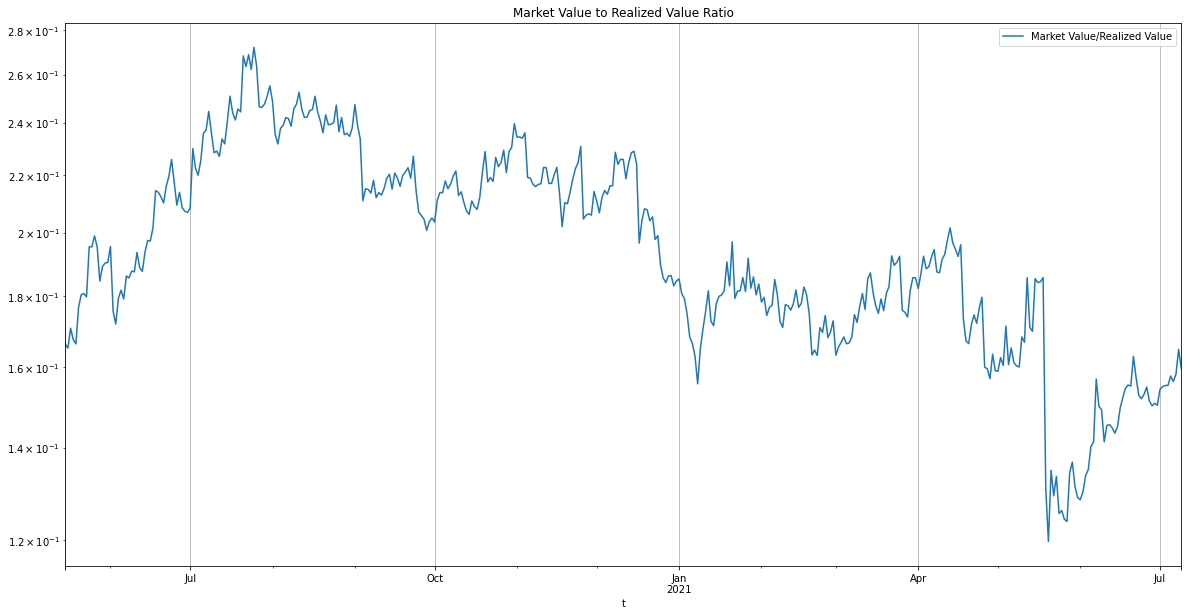

In [114]:
mvrv_df.plot(figsize=(20,10), grid=True, logy=True, title='Market Value to Realized Value Ratio')

In [115]:
## Extract Puell Multiple

In [116]:
puell = requests.get('https://api.glassnode.com/v1/metrics/indicators/puell_multiple', params={'a': coin, 'api_key': API_KEY})

In [117]:
puell_df = pd.read_json(puell.text, convert_dates=['t'])
puell_df.set_index('t', inplace=True)
puell_df = puell_df.rename(columns={'v':'Puell Multiple'})
puell_df

Puell Multiple
t                         
2011-07-16        3.656330
2011-07-17        3.830945
2011-07-18        3.691357
2011-07-19        3.244558
2011-07-20        3.366804
...                    ...
2021-07-05        1.058615
2021-07-06        1.137611
2021-07-07        0.994784
2021-07-08        1.068654
2021-07-09        1.014077

[3647 rows x 1 columns]

<AxesSubplot:title={'center':'Puell Multiple'}, xlabel='t'>

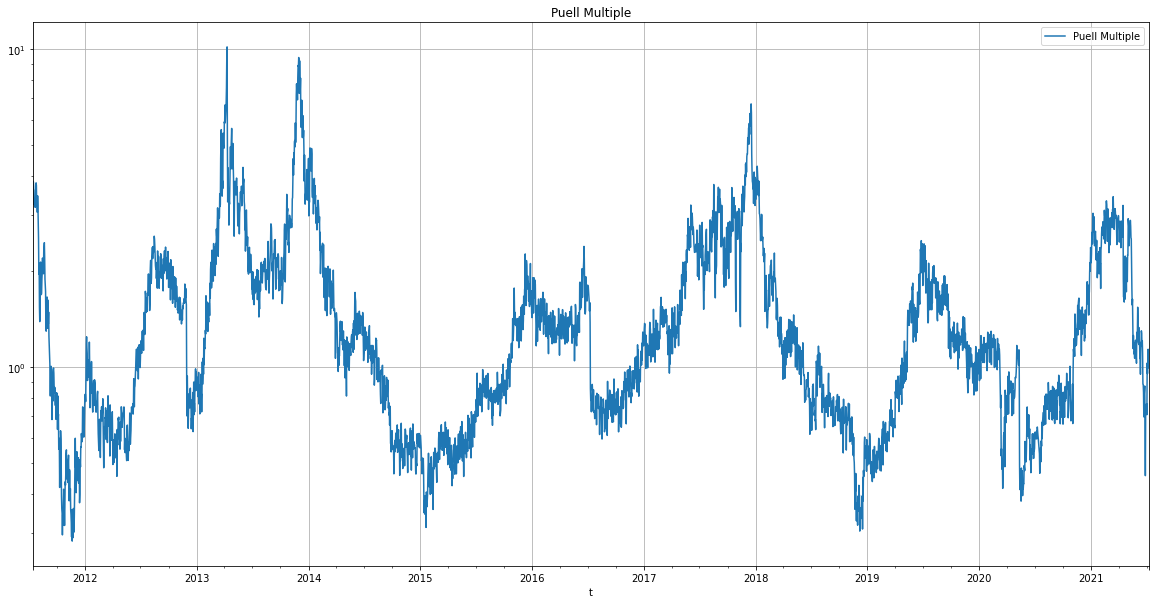

In [118]:
puell_df.plot(figsize=(20,10), grid=True, logy=True, title='Puell Multiple')

In [119]:
## Extract Stablecoin Supply Ratio (SSR) Oscillator

In [120]:
ssro = requests.get('https://api.glassnode.com/v1/metrics/indicators/ssr_oscillator', params={'a': coin, 'api_key': API_KEY})

In [121]:
ssro_df = pd.read_json(ssro.text, convert_dates=['t'])
ssro_df.set_index('t', inplace=True)
ssro_df = ssro_df.rename(columns={'v':'Stablecoin Supply Ratio (SSR) Oscillator'})
ssro_df

Stablecoin Supply Ratio (SSR) Oscillator
t                                                   
2018-09-04                                 -0.833493
2018-09-05                                 -0.887271
2018-09-06                                 -1.171063
2018-09-07                                 -1.163901
2018-09-08                                 -1.198452
...                                              ...
2021-07-05                                 -1.681967
2021-07-06                                 -1.659758
2021-07-07                                 -1.629375
2021-07-08                                 -1.662471
2021-07-09                                 -1.633211

[1040 rows x 1 columns]

<AxesSubplot:title={'center':'Stablecoin Supply Ratio (SSR) Oscillator'}, xlabel='t'>

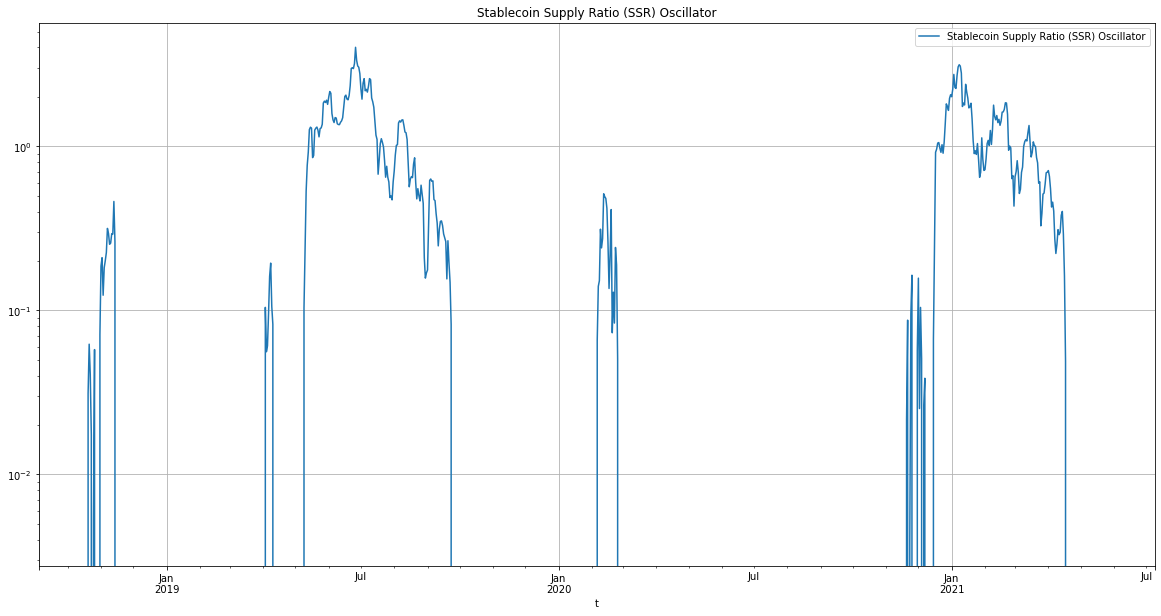

In [122]:
ssro_df.plot(figsize=(20,10), grid=True, logy=True, title='Stablecoin Supply Ratio (SSR) Oscillator')

In [123]:
## Extract Exchange Net Position Change

In [124]:
enpc = requests.get('https://api.glassnode.com/v1/metrics/distribution/exchange_net_position_change', params={'a': coin, 'api_key': API_KEY})

In [125]:
enpc_df = pd.read_json(enpc.text, convert_dates=['t'])
enpc_df.set_index('t', inplace=True)
enpc_df = enpc_df.rename(columns={'v':'Exchange Net Position Change'})
enpc_df

Exchange Net Position Change
t                                       
2011-09-16                     74.789093
2011-09-17                     69.740065
2011-09-18                     30.148647
2011-09-19                     38.196675
2011-09-20                     36.377675
...                                  ...
2021-07-05                 -19238.229231
2021-07-06                 -23793.356585
2021-07-07                 -29169.717682
2021-07-08                 -26875.717042
2021-07-09                 -17464.553971

[3585 rows x 1 columns]

<AxesSubplot:title={'center':'Exchange Net Position Change'}, xlabel='t'>

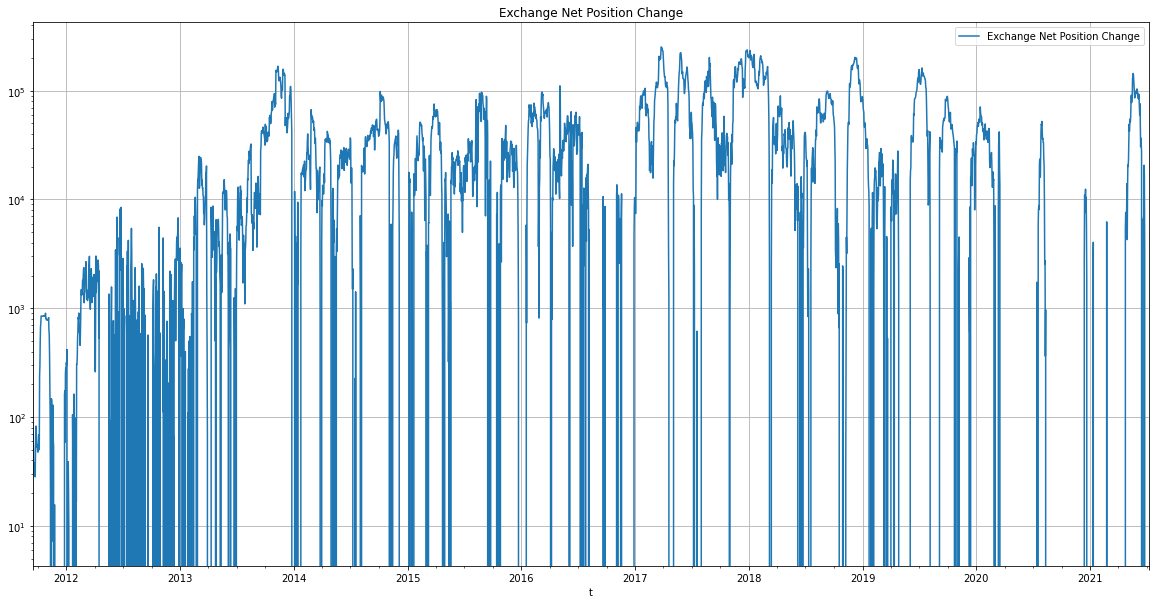

In [126]:
enpc_df.plot(figsize=(20,10), grid=True, logy=True, title='Exchange Net Position Change')

In [127]:
## Extract Grayscale Premium

In [128]:
gp = requests.get('https://api.glassnode.com/v1/metrics/institutions/grayscale_premium_percent', params={'a': coin, 'api_key': API_KEY})

In [129]:
gp_df = pd.read_json(gp.text, convert_dates=['t'])
gp_df.set_index('t', inplace=True)
gp_df = gp_df.rename(columns={'v':'Grayscale Premium'})
gp_df

Grayscale Premium
t                            
2021-01-10           0.174900
2021-01-11           0.156400
2021-01-12           0.180200
2021-01-13           0.240200
2021-01-14           0.195300
...                       ...
2021-07-05          -0.088357
2021-07-06          -0.106131
2021-07-07          -0.115112
2021-07-08          -0.118328
2021-07-09          -0.110039

[181 rows x 1 columns]

<AxesSubplot:title={'center':'Grayscale Premium'}, xlabel='t'>

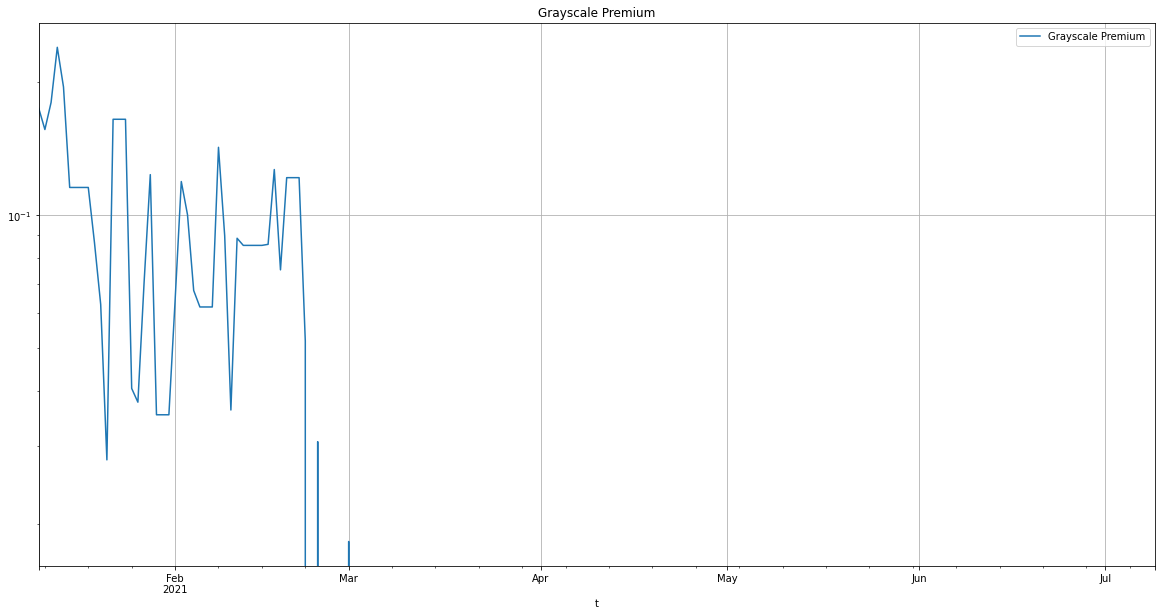

In [130]:
gp_df.plot(figsize=(20,10), grid=True, logy=True, title='Grayscale Premium')

In [131]:
## Extract Block Interval Mean

In [132]:
bim = requests.get('https://api.glassnode.com/v1/metrics/blockchain/block_interval_mean', params={'a': coin, 'api_key': API_KEY})

In [133]:
bim_df = pd.read_json(bim.text, convert_dates=['t'])
bim_df.set_index('t', inplace=True)
bim_df = bim_df.rename(columns={'v':'Block Interval Mean'})
bim_df

Block Interval Mean
t                              
2009-01-09         33506.000000
2009-01-10          2561.196721
2009-01-11           917.838710
2009-01-12           923.042553
2009-01-13           707.504065
...                         ...
2021-07-05           659.537879
2021-07-06           607.676056
2021-07-07           702.902439
2021-07-08           613.726619
2021-07-09           666.954198

[4565 rows x 1 columns]

<AxesSubplot:title={'center':'Block Interval Mean'}, xlabel='t'>

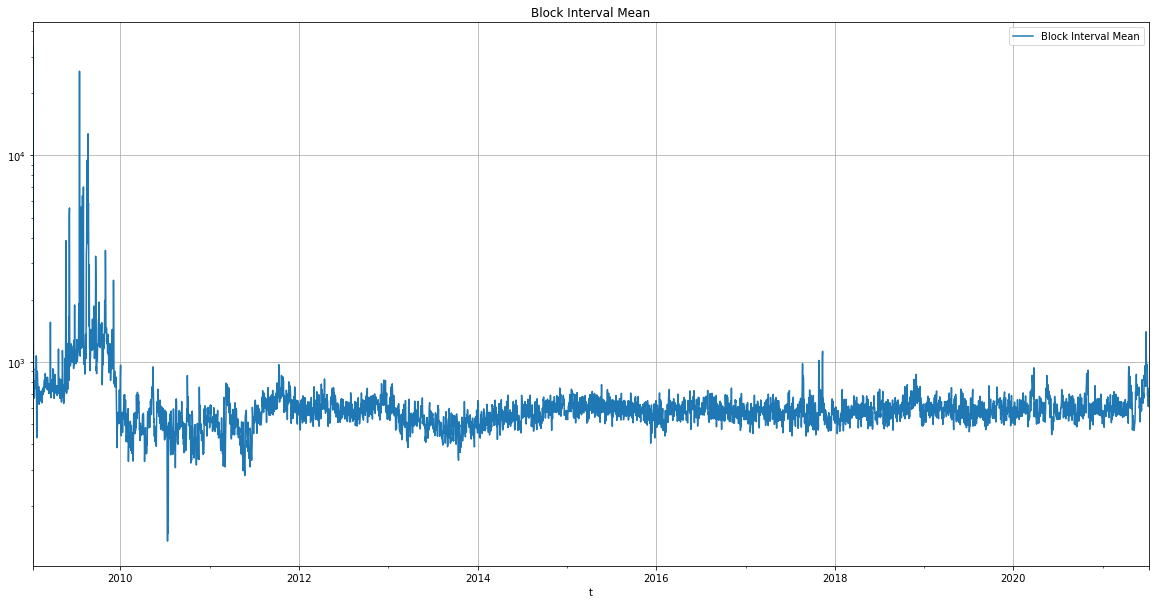

In [134]:
bim_df.plot(figsize=(20,10), grid=True, logy=True, title='Block Interval Mean')

In [135]:
# Set up the third of three sub-dataframes: Valuation

In [136]:
valuation_df_l2 = pd.concat([stf_df,mcttc_df,sopr_df,fpfr_df,felr_df,mvrv_df,puell_df,ssro_df,enpc_df,gp_df,bim_df],axis=1)
valuation_df_l2

Stock to Flow  Market Cap/Thermo Cap      SOPR  \
t                                                            
2009-01-09            NaN                    NaN       NaN   
2009-01-10            NaN                    NaN       NaN   
2009-01-11            NaN                    NaN       NaN   
2009-01-12            NaN                    NaN       NaN   
2009-01-13            NaN                    NaN       NaN   
...                   ...                    ...       ...   
2021-07-05       0.427749               0.427749  0.997970   
2021-07-06       0.433471               0.433471  0.998673   
2021-07-07       0.428202               0.428202  1.001324   
2021-07-08       0.411357               0.411357  0.996299   
2021-07-09       0.429202               0.429202  1.000270   

            Futures Perpetual Funding Rates  Futures Estimated Leverage Ratio  \
t                                                                               
2009-01-09                              NaN                               NaN   
2009-01-10                              NaN                               NaN   
2009-01-11                              NaN                               NaN   
2009-01-12                              NaN                               NaN   
2009-01-13                              NaN                               NaN   
...                                     ...                               ...   
2021-07-05                        -0.000166                          0.157650   
2021-07-06                        -0.000119                          0.156213   
2021-07-07                        -0.000009                          0.158095   
2021-07-08                        -0.000068                          0.164779   
2021-07-09                        -0.000026                          0.159600   

            Market Value/Realized Value  Puell Multiple  \
t                                                         
2009-01-09                          NaN             NaN   
2009-01-10                          NaN             NaN   
2009-01-11                          NaN             NaN   
2009-01-12                          NaN             NaN   
2009-01-13                          NaN             NaN   
...                                 ...             ...   
2021-07-05                     0.157650        1.058615   
2021-07-06                     0.156213        1.137611   
2021-07-07                     0.158095        0.994784   
2021-07-08                     0.164779        1.068654   
2021-07-09                     0.159600        1.014077   

            Stablecoin Supply Ratio (SSR) Oscillator  \
t                                                      
2009-01-09                                       NaN   
2009-01-10                                       NaN   
2009-01-11                                       NaN   
2009-01-12                                       NaN   
2009-01-13                                       NaN   
...                                              ...   
2021-07-05                                 -1.681967   
2021-07-06                                 -1.659758   
2021-07-07                                 -1.629375   
2021-07-08                                 -1.662471   
2021-07-09                                 -1.633211   

            Exchange Net Position Change  Grayscale Premium  \
t                                                             
2009-01-09                           NaN                NaN   
2009-01-10                           NaN                NaN   
2009-01-11                           NaN                NaN   
2009-01-12                           NaN                NaN   
2009-01-13                           NaN                NaN   
...                                  ...                ...   
2021-07-05                 -19238.229231          -0.088357   
2021-07-06                 -23793.356585          -0.106131   
2021-07-07              

In [137]:
valuation_df_l2.corr()

Stock to Flow  \
Stock to Flow                                  1.000000   
Market Cap/Thermo Cap                          1.000000   
SOPR                                           0.399952   
Futures Perpetual Funding Rates                0.722736   
Futures Estimated Leverage Ratio              -0.312141   
Market Value/Realized Value                   -0.312141   
Puell Multiple                                 0.627903   
Stablecoin Supply Ratio (SSR) Oscillator       0.540102   
Exchange Net Position Change                   0.081662   
Grayscale Premium                              0.501347   
Block Interval Mean                           -0.298518   

                                          Market Cap/Thermo Cap      SOPR  \
Stock to Flow                                          1.000000  0.399952   
Market Cap/Thermo Cap                                  1.000000  0.399952   
SOPR                                                   0.399952  1.000000   
Futures Perpetual Funding Rates                        0.722736  0.466526   
Futures Estimated Leverage Ratio                      -0.312141  0.059895   
Market Value/Realized Value                           -0.312141  0.059895   
Puell Multiple                                         0.627903  0.439073   
Stablecoin Supply Ratio (SSR) Oscillator               0.540102  0.539291   
Exchange Net Position Change                           0.081662  0.039995   
Grayscale Premium                                      0.501347  0.457449   
Block Interval Mean                                   -0.298518 -0.262414   

                                          Futures Perpetual Funding Rates  \
Stock to Flow                                                    0.722736   
Market Cap/Thermo Cap                                            0.722736   
SOPR                                                             0.466526   
Futures Perpetual Funding Rates                                  1.000000   
Futures Estimated Leverage Ratio                                -0.534977   
Market Value/Realized Value                                     -0.534977   
Puell Multiple                                                   0.508164   
Stablecoin Supply Ratio (SSR) Oscillator                         0.050340   
Exchange Net Position Change                                     0.221572   
Grayscale Premium                                               -0.172436   
Block Interval Mean                                             -0.335523   

                                          Futures Estimated Leverage Ratio  \
Stock to Flow                                                    -0.312141   
Market Cap/Thermo Cap                                            -0.312141   
SOPR                                                              0.059895   
Futures Perpetual Funding Rates                                  -0.534977   
Futures Estimated Leverage Ratio                                  1.000000   
Market Value/Realized Value                                       1.000000   
Puell Multiple                                                   -0.436932   
Stablecoin Supply Ratio (SSR) Oscillator                         -0.005816   
Exchange Net Position Change                                     -0.433192   
Grayscale Premium                                                 0.355482   
Block Interval Mean                                              -0.245704   

                                          Market Value/Realized Value  \
Stock to Flow                                               -0.312141   
Market Cap/Thermo Cap                                       -0.312141   
SOPR                                                         0.059895   
Futures Perpetual Funding Rates                             -0.534977   
Futures Estimated Leverage Ratio                             1.000000   
Market Value/Realized Value                                  1.000000   
Puell Multiple                     

In [138]:
# Due to high correlation, drop "Market Cap/Thermo Cap" and "Market Value/Realized Value".
# Due to limited data availability, drop fplr, felr, mvrv, ssro, gp

In [139]:
valuation_df_l2 = valuation_df_l2.drop(columns=['Market Cap/Thermo Cap','Market Value/Realized Value','Futures Perpetual Funding Rates','Futures Estimated Leverage Ratio','Stablecoin Supply Ratio (SSR) Oscillator','Grayscale Premium'])
valuation_df_l2.corr()

Stock to Flow      SOPR  Puell Multiple  \
Stock to Flow                      1.000000  0.399952        0.627903   
SOPR                               0.399952  1.000000        0.439073   
Puell Multiple                     0.627903  0.439073        1.000000   
Exchange Net Position Change       0.081662  0.039995        0.264469   
Block Interval Mean               -0.298518 -0.262414       -0.409227   

                              Exchange Net Position Change  \
Stock to Flow                                     0.081662   
SOPR                                              0.039995   
Puell Multiple                                    0.264469   
Exchange Net Position Change                      1.000000   
Block Interval Mean                              -0.100813   

                              Block Interval Mean  
Stock to Flow                           -0.298518  
SOPR                                    -0.262414  
Puell Multiple                          -0.409227  
Exchange Net Position Change            -0.100813  
Block Interval Mean                      1.000000

In [140]:
# heatmap of correlation
valuation_df_l2.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=600,
    height=400
)

:HeatMap   [columns,index]   (value)

In [141]:
# Build Feature Dataframe

In [142]:
features_df = pd.concat([network_health_df_l2,buyer_and_seller_behavior_df_l2,valuation_df_l2],axis=1)
features_df

Active Address  Total Transfer Volume  Velocity  \
t                                                             
2009-01-09             NaN                    NaN       NaN   
2009-01-10             NaN                    NaN       NaN   
2009-01-11             NaN                    NaN       NaN   
2009-01-12             NaN                    NaN       NaN   
2009-01-13             NaN                    NaN       NaN   
...                    ...                    ...       ...   
2021-07-05        920363.0           1.439888e+06  0.017975   
2021-07-06        838259.0           1.332011e+06  0.020433   
2021-07-07        812872.0           1.324880e+06  0.022266   
2021-07-08        800764.0           3.250505e+06  0.022810   
2021-07-09        841432.0           3.424756e+06  0.018888   

            Circulating Supply  Issuance  Difficulty     Thermocap  UTXO  CYD  \
t                                                                               
2009-01-09                 NaN       NaN         NaN           NaN   NaN  NaN   
2009-01-10                 NaN       NaN         NaN           NaN   NaN  NaN   
2009-01-11                 NaN       NaN         NaN           NaN   NaN  NaN   
2009-01-12                 NaN       NaN         NaN           NaN   NaN  NaN   
2009-01-13                 NaN       NaN         NaN           NaN   NaN  NaN   
...                        ...       ...         ...           ...   ...  ...   
2021-07-05         18748856.25    825.00    0.068791  2.724693e+10   NaN  NaN   
2021-07-06         18749743.75    887.50    0.078526  2.727725e+10   NaN  NaN   
2021-07-07         18750512.50    768.75    0.088585  2.730382e+10   NaN  NaN   
2021-07-08         18751381.25    868.75    0.098761  2.733241e+10   NaN  NaN   
2021-07-09         18752200.00    818.75    0.109115  2.735956e+10   NaN  NaN   

            NUPL  Realized Cap  Stock to Flow      SOPR  Puell Multiple  \
t                                                                         
2009-01-09   NaN           NaN            NaN       NaN             NaN   
2009-01-10   NaN           NaN            NaN       NaN             NaN   
2009-01-11   NaN           NaN            NaN       NaN             NaN   
2009-01-12   NaN           NaN            NaN       NaN             NaN   
2009-01-13   NaN           NaN            NaN       NaN             NaN   
...          ...           ...            ...       ...             ...   
2021-07-05   NaN           NaN       0.427749  0.997970        1.058615   
2021-07-06   NaN           NaN       0.433471  0.998673        1.137611   
2021-07-07   NaN           NaN       0.428202  1.001324        0.994784   
2021-07-08   NaN           NaN       0.411357  0.996299        1.068654   
2021-07-09   NaN           NaN       0.429202  1.000270        1.014077   

            Exchange Net Position Change  Block Interval Mean  
t                                                              
2009-01-09                           NaN         33506.000000  
2009-01-10                           NaN          2561.196721  
2009-01-11                           NaN           917.838710  
2009-01-12                           NaN           923.042553  
2009-01-13                           NaN           707.504065  
...                                  ...                  ...  
2021-07-05                 -19238.229231           659.537879  
2021-07-06                 -23793.356585           607.676056  
2021-07-07                 -29169.717682           702.902439  
2021-07-08                 -26875.717042           613.726619  
2021-07-09                 -17464.553971           666.954198  

[4565 rows x 16 columns]

In [143]:
# Heatmap visualization
features_df.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=1000,
    height=800
)

:HeatMap   [columns,index]   (value)

In [144]:
# Build Perceptron ML model

In [145]:
#Import modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [146]:
# Get BTC prices as y dataframe
btc_price_text = requests.get('https://api.glassnode.com/v1/metrics/market/price_usd_close', params={'a': coin, 'api_key': API_KEY})

In [147]:
btc_price_df = pd.read_json(btc_price_text.text, convert_dates=['t'])
btc_price_df.set_index('t', inplace=True)
btc_price_df = btc_price_df.rename(columns={'v':'BTC Prices'})
btc_price_df

BTC Prices
t                       
2010-07-17      0.049510
2010-07-18      0.085840
2010-07-19      0.080800
2010-07-20      0.074733
2010-07-21      0.079210
...                  ...
2021-07-06  34158.921224
2021-07-07  33850.914091
2021-07-08  32847.396790
2021-07-09  33878.236862
2021-07-10  33497.022823

[4012 rows x 1 columns]

In [148]:
# btc_price_df['daily_return']=btc_price_df.pct_change()
# btc_price_df

In [149]:
full_data_df = pd.concat([features_df,btc_price_df],axis=1)
full_data_df = full_data_df.drop(columns=['UTXO','CYD','NUPL','Realized Cap'])
full_data_df = full_data_df.dropna()
full_data_df

Active Address  Total Transfer Volume  Velocity  \
t                                                             
2011-09-16         14298.0           6.686519e+05  0.091714   
2011-09-17         12877.0           3.474938e+05  0.047538   
2011-09-18         14074.0           2.909793e+05  0.039746   
2011-09-19         15826.0           3.283994e+05  0.044772   
2011-09-20         21668.0           3.465190e+05  0.047339   
...                    ...                    ...       ...   
2021-07-05        920363.0           1.439888e+06  0.017975   
2021-07-06        838259.0           1.332011e+06  0.020433   
2021-07-07        812872.0           1.324880e+06  0.022266   
2021-07-08        800764.0           3.250505e+06  0.022810   
2021-07-09        841432.0           3.424756e+06  0.018888   

            Circulating Supply  Issuance  Difficulty     Thermocap  \
t                                                                    
2011-09-16          7282650.00   5950.00    0.201774  1.549893e+07   
2011-09-17          7289350.00   6700.00    0.198742  1.553111e+07   
2011-09-18          7297250.00   7900.00    0.195757  1.556955e+07   
2011-09-19          7303600.00   6350.00    0.192818  1.560236e+07   
2011-09-20          7310600.00   7000.00    0.189927  1.564377e+07   
...                        ...       ...         ...           ...   
2021-07-05         18748856.25    825.00    0.068791  2.724693e+10   
2021-07-06         18749743.75    887.50    0.078526  2.727725e+10   
2021-07-07         18750512.50    768.75    0.088585  2.730382e+10   
2021-07-08         18751381.25    868.75    0.098761  2.733241e+10   
2021-07-09         18752200.00    818.75    0.109115  2.735956e+10   

            Stock to Flow      SOPR  Puell Multiple  \
t                                                     
2011-09-16      -0.269386  0.966420        0.683785   
2011-09-17      -0.281332  0.979530        0.766186   
2011-09-18      -0.175390  0.981822        0.913495   
2011-09-19      -0.110628  0.968994        0.782018   
2011-09-20       0.001172  0.998393        0.981353   
...                   ...       ...             ...   
2021-07-05       0.427749  0.997970        1.058615   
2021-07-06       0.433471  0.998673        1.137611   
2021-07-07       0.428202  1.001324        0.994784   
2021-07-08       0.411357  0.996299        1.068654   
2021-07-09       0.429202  1.000270        1.014077   

            Exchange Net Position Change  Block Interval Mean    BTC Prices  
t                                                                            
2011-09-16                     74.789093           727.445378      4.811000  
2011-09-17                     69.740065           649.186567      4.764700  
2011-09-18                     30.148647           552.993671      5.238233  
2011-09-19                     38.196675           676.834646      5.462771  
2011-09-20                     36.377675           620.750000      6.114797  
...                                  ...                  ...           ...  
2021-07-05                 -19238.229231           659.537879  33821.809117  
2021-07-06                 -23793.356585           607.676056  34158.921224  
2021-07-07                 -29169.717682           702.902439  33850.914091  
2021-07-08                 -26875.717042           613.726619  32847.396790  
2021-07-09                 -17464.553971           666.954198  33878.236862  

[3585 rows x 13 columns]

In [150]:
X = full_data_df.drop(columns=['BTC Prices'])
X

Active Address  Total Transfer Volume  Velocity  \
t                                                             
2011-09-16         14298.0           6.686519e+05  0.091714   
2011-09-17         12877.0           3.474938e+05  0.047538   
2011-09-18         14074.0           2.909793e+05  0.039746   
2011-09-19         15826.0           3.283994e+05  0.044772   
2011-09-20         21668.0           3.465190e+05  0.047339   
...                    ...                    ...       ...   
2021-07-05        920363.0           1.439888e+06  0.017975   
2021-07-06        838259.0           1.332011e+06  0.020433   
2021-07-07        812872.0           1.324880e+06  0.022266   
2021-07-08        800764.0           3.250505e+06  0.022810   
2021-07-09        841432.0           3.424756e+06  0.018888   

            Circulating Supply  Issuance  Difficulty     Thermocap  \
t                                                                    
2011-09-16          7282650.00   5950.00    0.201774  1.549893e+07   
2011-09-17          7289350.00   6700.00    0.198742  1.553111e+07   
2011-09-18          7297250.00   7900.00    0.195757  1.556955e+07   
2011-09-19          7303600.00   6350.00    0.192818  1.560236e+07   
2011-09-20          7310600.00   7000.00    0.189927  1.564377e+07   
...                        ...       ...         ...           ...   
2021-07-05         18748856.25    825.00    0.068791  2.724693e+10   
2021-07-06         18749743.75    887.50    0.078526  2.727725e+10   
2021-07-07         18750512.50    768.75    0.088585  2.730382e+10   
2021-07-08         18751381.25    868.75    0.098761  2.733241e+10   
2021-07-09         18752200.00    818.75    0.109115  2.735956e+10   

            Stock to Flow      SOPR  Puell Multiple  \
t                                                     
2011-09-16      -0.269386  0.966420        0.683785   
2011-09-17      -0.281332  0.979530        0.766186   
2011-09-18      -0.175390  0.981822        0.913495   
2011-09-19      -0.110628  0.968994        0.782018   
2011-09-20       0.001172  0.998393        0.981353   
...                   ...       ...             ...   
2021-07-05       0.427749  0.997970        1.058615   
2021-07-06       0.433471  0.998673        1.137611   
2021-07-07       0.428202  1.001324        0.994784   
2021-07-08       0.411357  0.996299        1.068654   
2021-07-09       0.429202  1.000270        1.014077   

            Exchange Net Position Change  Block Interval Mean  
t                                                              
2011-09-16                     74.789093           727.445378  
2011-09-17                     69.740065           649.186567  
2011-09-18                     30.148647           552.993671  
2011-09-19                     38.196675           676.834646  
2011-09-20                     36.377675           620.750000  
...                                  ...                  ...  
2021-07-05                 -19238.229231           659.537879  
2021-07-06                 -23793.356585           607.676056  
2021-07-07                 -29169.717682           702.902439  
2021-07-08                 -26875.717042           613.726619  
2021-07-09                 -17464.553971           666.954198  

[3585 rows x 12 columns]

In [151]:
y = full_data_df['BTC Prices']
y

t
2011-09-16        4.811000
2011-09-17        4.764700
2011-09-18        5.238233
2011-09-19        5.462771
2011-09-20        6.114797
                  ...     
2021-07-05    33821.809117
2021-07-06    34158.921224
2021-07-07    33850.914091
2021-07-08    32847.396790
2021-07-09    33878.236862
Freq: D, Name: BTC Prices, Length: 3585, dtype: float64

In [175]:
# Divide data set into traning and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.9)

In [176]:
# Instantiate data scaler
scaler = StandardScaler()

# Fit the Scaler with the training data
# X_scaler = scaler.fit(X_train)
X_scaler = scaler.fit(X)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled =X_scaler.transform(X)

In [177]:
# Define the Perceptron model - deep neural net with two hidden layers
number_input_features = len(X_train.iloc[0])
number_output = 1
hidden_nodes_layer1 = round((number_input_features + number_output) // 2)
hidden_nodes_layer2 = round((hidden_nodes_layer1 + number_output) // 2)
# hidden_nodes_layer3 = round((hidden_nodes_layer2 + number_output) // 2)
# hidden_nodes_layer4 = round((hidden_nodes_layer3 + number_output) // 2)

In [178]:
# Create a sequential neural network model
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the third hidden layer
# nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Add the fourth hidden layer
# nn.add(Dense(units=hidden_nodes_layer4, activation="relu"))

# Add the output layer
nn.add(Dense(units=number_output, activation="linear")) 

nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [179]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"]) 

# Fit the model
percepton_model = nn.fit(X_train_scaled, y_train, epochs=100)
# percepton_model = nn.fit(X_scaled, y, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
101/101 [==============================] - 1s 2ms/step - loss: 146873728.0000 - mse: 146873728.0000
Epoch 2/100
101/101 [==============================] - 0s 1ms/step - loss: 146868048.0000 - mse: 146868048.0000
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 146844576.0000 - mse: 146844576.0000
Epoch 4/100
101/101 [==============================] - 0s 1ms/step - loss: 146767056.0000 - mse: 146767056.0000
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 146605440.0000 - mse: 146605440.0000
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 146338144.0000 - mse: 146338144.0000
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 145953744.0000 - mse: 145953744.0000
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 145438896.0000 - mse: 145438896.0000
Epoch 9/100
101/101 [==============================] - 0s 2ms/step - loss: 144794736.0000 - mse: 1447947

In [180]:
# Evaluate the model using testing data
model_loss, model_mse = nn.evaluate(X_test_scaled, y_test, verbose=2)

12/12 - 0s - loss: 28385970.0000 - mse: 28385970.0000


In [181]:
# Make predictions using X_test_scaled
predictions =nn.predict(X_test_scaled)

# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"Predicted Price": predictions.ravel(), "Actual Price": y_test})
results.head(60)

Predicted Price  Actual Price
t                                        
2016-10-22      3717.331787    652.476798
2013-12-07        18.652155    693.824481
2011-12-18        18.652155      3.192505
2015-01-17        18.652155    199.713355
2016-03-26        18.652155    416.922983
2013-10-04        18.652155    121.940000
2013-10-11        18.652155    127.402813
2012-10-13        18.652155     11.865473
2014-06-18        18.652155    607.000000
2014-01-09        18.652155    825.866501
2014-02-27        18.652155    583.057392
2021-03-23     31215.203125  54888.855370
2016-11-23      5106.002930    741.616328
2018-09-27      6381.825195   6680.714612
2017-05-31      8627.127930   2298.220975
2014-07-10        18.652155    616.775924
2015-02-15        18.652155    235.045781
2012-11-09        18.652155     10.815263
2018-05-25      3939.522461   7453.440000
2020-07-29     19520.271484  11098.410091
2012-10-17        18.652155     11.923778
2018-05-03      8011.729980   9755.310000
2020-03-26     13252.094727   6718.967315
2018-03-05     10926.111328  11573.300000
2021-04-25     27123.408203  49039.862341
2018-02-11      4639.803711   8073.293649
2017-07-12      7943.863770   2386.678935
2014-12-26        18.652155    329.312281
2012-06-10        18.652155      5.465250
2021-01-02     29100.736328  32031.619712
2018-01-15     13098.742188  13574.797735
2020-04-26     16090.318359   7680.482870
2017-03-16      4256.784180   1176.960884
2015-02-06        18.652155    222.783978
2013-03-26      1248.991821     79.810000
2015-11-30        18.652155    376.979697
2012-09-01        18.652155      9.976960
2014-07-29        18.652155    585.104546
2013-04-12        18.652155    108.311397
2012-04-22        18.652155      5.203517
2019-06-28     18307.261719  12392.329310
2012-09-18        18.652155     12.294733
2011-12-27        18.652155      4.107745
2016-10-06      2535.264893    611.355990
2020-07-20     17932.917969   9177.864483
2016-02-09        18.652155    372.762371
2018-06-02      5523.619141   7646.740000
2014-08-16        18.652155    522.748127
2019-07-08     14557.020508  12285.732374
2016-09-02      2743.389648    575.000911
2013-05-21        18.652155    117.348000
2012-10-06        18.652155     12.505000
2018-09-11      5485.661133   6324.590152
2017-08-10     10216.286133   3432.180555
2019-02-23      5598.574219   4145.988090
2018-03-02      7984.130371  11086.400000
2017-01-17      4207.210938    905.989127
2012-06-22        18.652155      6.525353
2014-04-30        18.652155    448.899420
2014-06-02        18.652155    662.085589

In [182]:
# importance = nn.coef_
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))

In [183]:
import datetime as dt
from fbprophet import Prophet

In [184]:
X_scaled_df=pd.DataFrame(X_scaled)
X_scaled_df

0         1         2         3         4         5         6   \
0    -1.350183 -0.488130 -0.014066 -2.362732  1.403177  0.854629 -0.804892   
1    -1.354309 -0.640213 -0.269771 -2.360631  1.785998  0.823120 -0.804888   
2    -1.350833 -0.666975 -0.314869 -2.358153  2.398511  0.792089 -0.804882   
3    -1.345745 -0.649255 -0.285778 -2.356162  1.607348  0.761548 -0.804878   
4    -1.328780 -0.640675 -0.270920 -2.353966  1.939126  0.731509 -0.804872   
...        ...       ...       ...       ...       ...       ...       ...   
3580  1.281068 -0.122914 -0.440886  1.233493 -1.212765 -0.527428  2.987609   
3581  1.042634 -0.173999 -0.426660  1.233771 -1.180863 -0.426262  2.991832   
3582  0.968909 -0.177376 -0.416050  1.234012 -1.241477 -0.321718  2.995532   
3583  0.933747  0.734495 -0.412901  1.234285 -1.190434 -0.215963  2.999513   
3584  1.051849  0.817011 -0.435602  1.234542 -1.215955 -0.108352  3.003295   

            7         8         9         10        11  
0    -1.821202 -1.588723 -0.714598 -0.396446  1.888029  
1    -1.858618 -1.027604 -0.638880 -0.396539  0.866360  
2    -1.526794 -0.929516 -0.503518 -0.397265 -0.389438  
3    -1.323950 -1.478561 -0.624331 -0.397118  1.227306  
4    -0.973778 -0.220266 -0.441164 -0.397151  0.495121  
...        ...       ...       ...       ...       ...  
3580  0.362324 -0.238400 -0.370168 -0.750877  1.001497  
3581  0.380243 -0.208293 -0.297579 -0.834472  0.324440  
3582  0.363741 -0.094826 -0.428822 -0.933139  1.567621  
3583  0.310982 -0.309921 -0.360943 -0.891039  0.403430  
3584  0.366875 -0.139960 -0.411094 -0.718327  1.098317  

[3585 rows x 12 columns]

In [185]:
X_reset_index = X.reset_index()
column_names = X_reset_index.iloc[0,0:13]
column_names = pd.DataFrame(column_names)
column_names = column_names.reset_index()
#column_names.drop(columns='0')
column_names

index                    0
0                              t  2011-09-16 00:00:00
1                 Active Address                14298
2          Total Transfer Volume               668652
3                       Velocity            0.0917143
4             Circulating Supply          7.28265e+06
5                       Issuance                 5950
6                     Difficulty             0.201774
7                      Thermocap          1.54989e+07
8                  Stock to Flow            -0.269386
9                           SOPR              0.96642
10                Puell Multiple             0.683785
11  Exchange Net Position Change              74.7891
12           Block Interval Mean              727.445

In [186]:
column_names_12 = X_reset_index.iloc[0,1:13]
column_names_12 = pd.DataFrame(column_names_12)
column_names_12 = column_names_12.reset_index()
column_names_12

index            0
0                 Active Address        14298
1          Total Transfer Volume       668652
2                       Velocity    0.0917143
3             Circulating Supply  7.28265e+06
4                       Issuance         5950
5                     Difficulty     0.201774
6                      Thermocap  1.54989e+07
7                  Stock to Flow    -0.269386
8                           SOPR      0.96642
9                 Puell Multiple     0.683785
10  Exchange Net Position Change      74.7891
11           Block Interval Mean      727.445

In [187]:
ds = X_reset_index.iloc[:,0]
ds

0      2011-09-16
1      2011-09-17
2      2011-09-18
3      2011-09-19
4      2011-09-20
          ...    
3580   2021-07-05
3581   2021-07-06
3582   2021-07-07
3583   2021-07-08
3584   2021-07-09
Name: t, Length: 3585, dtype: datetime64[ns]

In [188]:
target_day_feature_range = pd.DataFrame(columns=['yhat', 'yhat_lower', 'yhat_upper'])
target_day_feature_range['Feature']=column_names['index']
target_day_feature_range = target_day_feature_range.set_index('Feature')
target_day_feature_range

yhat yhat_lower yhat_upper
Feature                                                
t                             NaN        NaN        NaN
Active Address                NaN        NaN        NaN
Total Transfer Volume         NaN        NaN        NaN
Velocity                      NaN        NaN        NaN
Circulating Supply            NaN        NaN        NaN
Issuance                      NaN        NaN        NaN
Difficulty                    NaN        NaN        NaN
Thermocap                     NaN        NaN        NaN
Stock to Flow                 NaN        NaN        NaN
SOPR                          NaN        NaN        NaN
Puell Multiple                NaN        NaN        NaN
Exchange Net Position Change  NaN        NaN        NaN
Block Interval Mean           NaN        NaN        NaN

In [189]:
# column_prophet = X_scaled_df[0]
# column_prophet = pd.concat([ds,column_prophet], axis=1)
# column_prophet.columns = ['ds', 'y']
# m = Prophet()
# # Fit the time series model
# m.fit(column_prophet)

In [190]:
# column_future = m.make_future_dataframe(periods=forecast_period, freq='D')
# column_forecast = m.predict(column_future)
# column_forecast = column_forecast.iloc[-1,:]
# column_forecast


In [191]:
forecast_period = 30
n=0
for item in column_names_12['index']:
    column_prophet = X_scaled_df[n]
    column_prophet = pd.concat([ds,column_prophet], axis=1)
    column_prophet.columns = ['ds', 'y']
    m = Prophet()
    # Fit the time series model
    m.fit(column_prophet)
    # Create a future DataFrame to hold predictions. Make the prediction go out as far as 7 days
    column_future = m.make_future_dataframe(periods=forecast_period, freq='D')
    # Make a forecast based on the future DataFrame
    column_forecast = m.predict(column_future)
    column_forecast = column_forecast.iloc[-1,0:4]
    target_day_feature_range.iloc[0][0]= column_forecast["ds"]
    target_day_feature_range.iloc[0][1]= column_forecast["ds"]
    target_day_feature_range.iloc[0][2]= column_forecast["ds"]
    target_day_feature_range.iloc[n+1][0] = column_forecast["trend"]
    target_day_feature_range.iloc[n+1][1] = column_forecast["yhat_lower"]
    target_day_feature_range.iloc[n+1][2] = column_forecast["yhat_upper"]
    n+=1
target_day_feature_range

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

yhat           yhat_lower  \
Feature                                                                  
t                             2021-08-08 00:00:00  2021-08-08 00:00:00   
Active Address                            1.83802              1.35631   
Total Transfer Volume                    0.109412             -1.28128   
Velocity                                -0.370701             -1.64807   
Circulating Supply                        1.27106              1.25837   
Issuance                                 -1.32499             -1.63815   
Difficulty                               -0.92856             -1.31759   
Thermocap                                 2.70058              2.61004   
Stock to Flow                              1.0555             0.643149   
SOPR                                     0.435088             -0.53151   
Puell Multiple                           0.315844            -0.588117   
Exchange Net Position Change             -1.24635             -2.46416   
Block Interval Mean                      0.696913            -0.563258   

                                       yhat_upper  
Feature                                            
t                             2021-08-08 00:00:00  
Active Address                             1.9467  
Total Transfer Volume                    0.975077  
Velocity                                 0.483865  
Circulating Supply                        1.27747  
Issuance                                -0.927046  
Difficulty                              -0.636595  
Thermocap                                 2.78301  
Stock to Flow                             1.77704  
SOPR                                      1.77056  
Puell Multiple                            1.10868  
Exchange Net Position Change            -0.290872  
Block Interval Mean                       1.66239

In [192]:
target_day_feature_range=target_day_feature_range.transpose()
target_day_feature_range

Feature             t Active Address Total Transfer Volume  Velocity  \
yhat       2021-08-08        1.83802              0.109412 -0.370701   
yhat_lower 2021-08-08        1.35631              -1.28128  -1.64807   
yhat_upper 2021-08-08         1.9467              0.975077  0.483865   

Feature    Circulating Supply  Issuance Difficulty Thermocap Stock to Flow  \
yhat                  1.27106  -1.32499   -0.92856   2.70058        1.0555   
yhat_lower            1.25837  -1.63815   -1.31759   2.61004      0.643149   
yhat_upper            1.27747 -0.927046  -0.636595   2.78301       1.77704   

Feature         SOPR Puell Multiple Exchange Net Position Change  \
yhat        0.435088       0.315844                     -1.24635   
yhat_lower  -0.53151      -0.588117                     -2.46416   
yhat_upper   1.77056        1.10868                    -0.290872   

Feature    Block Interval Mean  
yhat                  0.696913  
yhat_lower           -0.563258  
yhat_upper             1.66239

In [193]:
target_day_feature_range=target_day_feature_range.reset_index()
target_day_feature_range=target_day_feature_range.drop(columns='index')
target_day_feature_range=target_day_feature_range.set_index('t')
target_day_feature_range

Feature    Active Address Total Transfer Volume  Velocity Circulating Supply  \
t                                                                              
2021-08-08        1.83802              0.109412 -0.370701            1.27106   
2021-08-08        1.35631              -1.28128  -1.64807            1.25837   
2021-08-08         1.9467              0.975077  0.483865            1.27747   

Feature     Issuance Difficulty Thermocap Stock to Flow      SOPR  \
t                                                                   
2021-08-08  -1.32499   -0.92856   2.70058        1.0555  0.435088   
2021-08-08  -1.63815   -1.31759   2.61004      0.643149  -0.53151   
2021-08-08 -0.927046  -0.636595   2.78301       1.77704   1.77056   

Feature    Puell Multiple Exchange Net Position Change Block Interval Mean  
t                                                                           
2021-08-08       0.315844                     -1.24635            0.696913  
2021-08-08      -0.588117                     -2.46416           -0.563258  
2021-08-08        1.10868                    -0.290872             1.66239

In [194]:
import numpy as np
# convert Numpy array to a Tensor
feature_array = np.asarray(target_day_feature_range).astype('float32')

In [195]:
# Make predictions using feature_predictions
target_day_predictions =nn.predict(feature_array)

# Create a DataFrame to compare the predictions with the actual values
target_day_results = pd.DataFrame({"Predicted BTC Prices": target_day_predictions.ravel()})
target_day_results.head(20)

Predicted BTC Prices
0          30192.275391
1          28605.121094
2          32741.501953

In [196]:
# import random

# for i in range(3):
    
    
#     rand_num = random.randint(0,2)
#     print(target_day_feature_range["Active Address"][rand_num])
